<a href="https://colab.research.google.com/github/ArminD93/BigFivePersonalityTest/blob/dev/BigFivePersonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Five Personality Test**
---

# **Spis treści:**

# 1. [**Opis wartości z kolumn**](#0)
# 2. [**Import bibliotek**](#1)
# 3. [**Przygotowanie danych:**](#2)
  > ## 3.1. [Prezentacja danych](#3)
  > ## 3.2. [Zmiana typu object na typ category i datetime](#4)
  > ## 3.3. [Brakujące wartości](#5)
  > ## 3.4. [Wybranie rekordów gdzie IPC != 1](#6)
  > ## 3.5. [Czy występują jakieś wartości zerowe? ](#7)
# 4. [**Analiza danych:**](#8)
  > ## 4.1. [Liczba wystąpień poszczególnych odpowiedzi dla każdego zagadnienia](#9)
  > ## 4.2. [Analiza korelacji w zbiorze zagadnień z zakresu Extraversion](#10)
   >> ### 4.2.1. [Opis oznaczeń dla Factor I - Extraversion](#11) 
   >> ### 4.2.2. [Przygotowanie danych](#12) 
   >> ### 4.2.3. [Mapa korelacji dla Extraversion](#13)  

  > ## 4.3. [Analiza korelacji w zbiorze zagadnień z zakresu Agreeableness](#14)
   >> ### 4.3.1. [Opis oznaczeń dla Factor II - Agreeableness](#15) 
   >> ### 4.3.2. [Przygotowanie danych](#16) 
   >> ### 4.3.3. [Mapa korelacji dla Agreeableness](#17)  
  > ## 4.4. [Analiza korelacji w zbiorze zagadnień z zakresu Conscientiousness](#18)
   >> ### 4.4.1. [Opis oznaczeń dla Factor III - Conscientiousness](#19) 
   >> ### 4.4.2. [Przygotowanie danych](#20) 
   >> ### 4.4.3. [Mapa korelacji dla Conscientiousness](#21)
      > ## 4.5. [Analiza korelacji w zbiorze zagadnień z zakresu Emotional Stability (Neuroticism)](#22)
   >> ### 4.5.1. [Opis oznaczeń dla Factor IV - Emotional Stability (Neuroticism)](#23) 
   >> ### 4.5.2. [Przygotowanie danych](#24) 
   >> ### 4.5.3. [Mapa korelacji dla Emotional Stability (Neuroticism)](#25) 
    > ## 4.6. [Analiza korelacji w zbiorze zagadnień z zakresu Intellect or Imagination (Openness)](#26)
   >> ### 4.6.1. [Opis oznaczeń dla Factor V - Intellect or Imagination (Openness)](#27) 
   >> ### 4.6.2. [Przygotowanie danych](#28) 
   >> ### 4.6.3. [Mapa korelacji dla Intellect or Imagination (Openness)](#29)
    > ## 4.7. [Państwa o najwyższym poziomie Extraversion](#30)
    > ## 4.8. [Diagram typu radar dla wybranego wiersza](#31)

    
 










# <a name='0'></a> **1. Opis wartości z kolumn**

The following items were presented on one page and each was rated on a five point scale using radio buttons. The order on page was was EXT1, AGR1, CSN1, EST1, OPN1, EXT2, etc.
The scale was labeled 1=Disagree, 3=Neutral, 5=Agree

5 major dimensions of personality: Openness, Conscientiousness, Agreeableness, Extraversion, and Neuroticism.
- EXT - Extraversion,
- EST - Neuroticism,
- AGR - Agreeableness (Zgodność),
- CSN - Conscientiousness (sumienność),
- OPN - Openness


|Oznaczenie |Opis |Oznaczenie |Opis|Oznaczenie |Opis|
|--------- |:----|--------  |:---|:-----  |:----|
|**EXT1**	|I am the life of the party.|**EST1**	|I get stressed out easily.|**AGR1**	|I feel little concern for others.|
|**EXT2**	|I don't talk a lot.|**EST2**	|I am relaxed most of the time.|**AGR2**	|I am interested in people.|
|**EXT3**	|I feel comfortable around people.|**EST3**	|I worry about things.|**AGR3**	|I insult people.|
|**EXT4**	|I keep in the background.|**EST4**	|I seldom feel blue.|**AGR4**	|I sympathize with others' feelings.|
|**EXT5**	|I start conversations.|**EST5** |I am easily disturbed.|**AGR5**	|I am not interested in other people's problems.|
|**EXT6**	|I have little to say.|**EST6**	|I get upset easily.|**AGR6**	|I have a soft heart.|
|**EXT7**	|I talk to a lot of different people at parties.|**EST7**	|I change my mood a lot.|**AGR7**	|I am not really interested in others.|
|**EXT8**	|I don't like to draw attention to myself.|**EST8**	|I have frequent mood swings.|**AGR8**	|I take time out for others.|
|**EXT9**	|I don't mind being the center of attention.|**EST9**	|I get irritated easily.|**AGR9**	|I feel others' emotions.|
|**EXT10** |I am quiet around strangers.|**EST10** |I often feel blue.|**AGR10**	|I make people feel at ease.|
|||||||
|**CSN1**	|I am always prepared.|**OPN1**	|I have a rich vocabulary.| **dateload**|The timestamp when the survey was started.|
|**CSN2**	|I leave my belongings around.|**OPN2**	|I have difficulty understanding abstract ideas.|**screenw**|The width the of user's screen in pixels|
|**CSN3**	|I pay attention to details.|**OPN3**	|I have a vivid imagination.|**screenh**|The height of the user's screen in pixels|
|**CSN4**	|I make a mess of things.|**OPN4**	|I am not interested in abstract ideas.|**introelapse**|The time in seconds spent on the landing / intro page|
|**CSN5**	|I get chores done right away.|**OPN5**	|I have excellent ideas.|**testelapse**|The time in seconds spent on the page with the survey questions|
|**CSN6**	|I often forget to put things back in their proper place.|**OPN6**	|I do not have a good imagination.|**endelapse**|The time in seconds spent on the finalization page (where the user was asked to indicate if they has answered accurately and their answers could be stored and used for research. Again: this dataset only includes users who answered "Yes" to this question, users were free to answer no and could still view their results either way)|
|**CSN7**	|I like order.|**OPN7**	|I am quick to understand things.|**IPC**|The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions|
|**CSN8**	|I shirk my duties.|**OPN8**	|I use difficult words.|**country**|The country, determined by technical information (NOT ASKED AS A QUESTION)|
|**CSN9**	|I follow a schedule.|**OPN9**	|I spend time reflecting on things.|**lat_appx_lots_of_err**|approximate latitude of user. determined by technical information, THIS IS NOT VERY ACCURATE.|
|**CSN10** |I am exacting in my work.|**OPN10** |I am full of ideas.|**long_appx_lots_of_err**| approximate longitude of user|


---



The time spent on each question is also recorded in milliseconds. These are the variables ending in **_E**. This was calculated by taking the time when the button for the question was clicked minus the time of the most recent other button click.


# **Big-Five Factor Markers** 

## Factor I - Extraversion  
### 10-item scale (Alpha = .87) 

|    + keyed       |     – keyed          |  
|------- |:----                                        |
|	Am the life of the party. | Don't talk a lot.                 |
|	Feel comfortable around people. | Keep in the background.             |
|	Start conversations.    |  	Have little to say.                     |
|	Talk to a lot of different people at parties.      | 	Don't like to draw attention to myself. |
|	Don't mind being the center of attention.   | 	Am quiet around strangers.     |


## Factor II - Agreeableness
### 10-item scale (Alpha = .82)

|    + keyed       |     – keyed          |  
|------- |:----                                        |
|	Am interested in people. | Am not really interested in others.             |
|	Sympathize with others' feelings.  |Insult people.          |
|	 	Have a soft heart.    |Am not interested in other people's problems.                   |
|	Take time out for others.      | Feel little concern for others.  |
|	Feel others' emotions.  | 	    |
| Make people feel at ease.  |  | 


## Factor III - Conscientiousness
### 10-item scale (Alpha = .79)

|    + keyed       |     – keyed                   |  
|------- |:----                                    |
|	Am always prepared. | Leave my belongings around.|
|	Pay attention to details.  |Make a mess of things.|
|	Get chores done right away.   |Often forget to put things back in their proper place.                 |
|	Like order.  | Shirk my duties.   |
|	Follow a schedule. | 	    |
| Am exacting in my work. |  | 


## Factor IV - Emotional Stability (Neuroticism)
### 10-item scale (Alpha = .86)

|    + keyed       |     – keyed                   |  
|------- |:----                                    |
|Am relaxed most of the time.  | Get stressed out easily. |
|	Seldom feel blue.  | Worry about things.|
|	   |Am easily disturbed.               |
|	 | Get upset easily.   |
|	 | Change my mood a lot.	    |
| | Have frequent mood swings. | 
| |  	Get irritated easily. | 
| | Often feel blue.  | 


## Factor V - Intellect or Imagination (Openness)
### 10-item scale (Alpha = .84)

|    + keyed       |     – keyed                   |  
|------- |:----                                    |
|	Have a rich vocabulary. | Have difficulty understanding abstract ideas.|
|	Have a vivid imagination.  |Am not interested in abstract ideas. |
|	Have excellent ideas.  |Do not have a good imagination        |
|	Am quick to understand things. |  |
|	Use difficult words. | 	    |
| Spend time reflecting on things. |  | 
| Am full of ideas. |  | 



# <a name='1'></a> **2. Import bibliotek**

In [33]:
try:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import plotly.figure_factory as ff
  import plotly.express as px
  from plotly.subplots import make_subplots
  import seaborn as sns
  from itertools import islice
  import pycountry_convert as pc
except:
  !pip install pycountry_convert


%matplotlib inline

# <a name='2'></a> **3. Przygotowanie danych**

## <a name='3'></a>3.1. Prezentacja danych

In [34]:
BigFive_raw = pd.read_csv(
                          '/content/drive/My Drive/ColabNotebooks/BigFivePersonality/data-final.csv', low_memory=False, sep='\t',
                          
                          usecols=['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10',
                                   'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10',
                                   'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10',
                                   'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10',
                                   'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10',

                                  #  'EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E',
                                  #  'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E',
                                  #  'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E',
                                  #  'CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E',
                                  #  'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E',

                                   'dateload', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'
                           
                                   ]
                          )

# Kopia danych
BigFive = BigFive_raw.copy()                         
                            
BigFive.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2016-03-03 02:01:01,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,2016-03-03 02:01:20,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2016-03-03 02:01:56,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,2016-03-03 02:02:02,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,2016-03-03 02:02:57,8.0,315.0,17,2,KE,1.0,38.0


In [35]:
BigFive.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 58 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   EXT1                   1013558 non-null  float64
 1   EXT2                   1013558 non-null  float64
 2   EXT3                   1013558 non-null  float64
 3   EXT4                   1013558 non-null  float64
 4   EXT5                   1013558 non-null  float64
 5   EXT6                   1013558 non-null  float64
 6   EXT7                   1013558 non-null  float64
 7   EXT8                   1013558 non-null  float64
 8   EXT9                   1013558 non-null  float64
 9   EXT10                  1013558 non-null  float64
 10  EST1                   1013558 non-null  float64
 11  EST2                   1013558 non-null  float64
 12  EST3                   1013558 non-null  float64
 13  EST4                   1013558 non-null  float64
 14  EST5              

## <a name='4'></a>3.2. Zmiana typu object na typ category i datetime

In [36]:
BigFive.columns[:50]

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')

In [37]:
cols_name_list = list(BigFive.columns[:50]) + ['country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err', 'dateload']


for i, col_name in enumerate(cols_name_list):

  if col_name == 'dateload':
    BigFive['dateload'] = pd.to_datetime(BigFive['dateload'])
  else:
    BigFive[col_name] = BigFive[col_name].astype('category')



BigFive.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 58 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   EXT1                   1013558 non-null  category      
 1   EXT2                   1013558 non-null  category      
 2   EXT3                   1013558 non-null  category      
 3   EXT4                   1013558 non-null  category      
 4   EXT5                   1013558 non-null  category      
 5   EXT6                   1013558 non-null  category      
 6   EXT7                   1013558 non-null  category      
 7   EXT8                   1013558 non-null  category      
 8   EXT9                   1013558 non-null  category      
 9   EXT10                  1013558 non-null  category      
 10  EST1                   1013558 non-null  category      
 11  EST2                   1013558 non-null  category      
 12  EST3                   10135

## <a name='5'></a>3.3. Brakujące wartości

In [38]:
BigFive.isnull().sum()

EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
EXT6                     1783
EXT7                     1783
EXT8                     1783
EXT9                     1783
EXT10                    1783
EST1                     1783
EST2                     1783
EST3                     1783
EST4                     1783
EST5                     1783
EST6                     1783
EST7                     1783
EST8                     1783
EST9                     1783
EST10                    1783
AGR1                     1783
AGR2                     1783
AGR3                     1783
AGR4                     1783
AGR5                     1783
AGR6                     1783
AGR7                     1783
AGR8                     1783
AGR9                     1783
AGR10                    1783
CSN1                     1783
CSN2                     1783
CSN3                     1783
CSN4      

In [39]:
BigFive[pd.isnull(BigFive['EXT1'])].head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
78795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-03 11:12:38,30.0,NaN,133,1,US,38.0,-97.0
78854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-03 12:02:08,41.0,NaN,25,32,US,26.5584,-81.8997
78889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-05-03 12:19:04,15.0,NaN,11,3,US,28.0222,-81.7329
153202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-12 01:42:46,5.0,NaN,64279,77,SG,1.3667,103.8
153204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-12 01:43:12,22.0,NaN,55,77,SG,1.3667,103.8


In [40]:
BigFive = BigFive.dropna()
BigFive.info(memory_usage='Deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012050 entries, 0 to 1015340
Data columns (total 58 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   EXT1                   1012050 non-null  category      
 1   EXT2                   1012050 non-null  category      
 2   EXT3                   1012050 non-null  category      
 3   EXT4                   1012050 non-null  category      
 4   EXT5                   1012050 non-null  category      
 5   EXT6                   1012050 non-null  category      
 6   EXT7                   1012050 non-null  category      
 7   EXT8                   1012050 non-null  category      
 8   EXT9                   1012050 non-null  category      
 9   EXT10                  1012050 non-null  category      
 10  EST1                   1012050 non-null  category      
 11  EST2                   1012050 non-null  category      
 12  EST3                   10120

## <a name='6'></a>3.4. Wybranie rekordów gdzie IPC != 1

IPC         The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions

In [41]:
BigFive.IPC != 1

0          False
1          False
2          False
3          False
4           True
           ...  
1015336     True
1015337    False
1015338     True
1015339    False
1015340    False
Name: IPC, Length: 1012050, dtype: bool

In [42]:
IPC_index = BigFive[BigFive.IPC != 1].index

BigFive.drop(IPC_index , inplace=True)

In [43]:
BigFive.IPC != 1

0          False
1          False
2          False
3          False
5          False
           ...  
1015334    False
1015335    False
1015337    False
1015339    False
1015340    False
Name: IPC, Length: 694886, dtype: bool

In [44]:
BigFive.drop(['IPC'], 1, inplace=True)

In [45]:
BigFive.head(3)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2016-03-03 02:01:01,9.0,234.0,6,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,2016-03-03 02:01:20,12.0,179.0,11,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2016-03-03 02:01:56,3.0,186.0,7,GB,54.9119,-1.3833


## <a name='7'></a>3.5. Czy występują jakieś wartości zerowe? 

In [46]:
# Czy występują jakieś wartości 0 w introelapse, testelapse, endelapse?

if0_df = BigFive.loc[(BigFive['introelapse']==0) | (BigFive['testelapse']==0 )| (BigFive['endelapse']==0) ]
len(if0_df)

21

In [47]:
if0_df.head(3)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err
46867,4.0,3.0,5.0,1.0,5.0,4.0,5.0,5.0,1.0,1.0,2.0,3.0,1.0,3.0,3.0,2.0,3.0,3.0,2.0,1.0,5.0,1.0,3.0,1.0,3.0,1.0,3.0,3.0,2.0,1.0,2.0,5.0,3.0,1.0,5.0,4.0,3.0,3.0,3.0,1.0,2.0,5.0,1.0,5.0,3.0,5.0,3.0,1.0,1.0,1.0,2016-04-08 12:51:17,0.0,158.0,14,US,37.526,-122.3558
50094,1.0,5.0,2.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,3.0,3.0,2.0,1.0,2.0,1.0,2.0,4.0,1.0,4.0,3.0,2.0,2.0,3.0,3.0,5.0,3.0,1.0,3.0,4.0,1.0,5.0,1.0,2.0,2.0,5.0,2.0,3.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,4.0,5.0,5.0,2016-04-09 21:18:15,0.0,208.0,12,US,37.526,-122.3558
57062,3.0,1.0,5.0,2.0,4.0,4.0,5.0,4.0,3.0,4.0,1.0,5.0,1.0,0.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,4.0,4.0,5.0,1.0,5.0,1.0,5.0,2.0,5.0,2.0,5.0,5.0,5.0,3.0,3.0,3.0,4.0,2.0,5.0,3.0,4.0,5.0,2016-04-14 04:15:07,0.0,872.0,31,NO,59.95,10.75


In [48]:
# Czy występują jakieś wartości 0 w introelapse?

BigFive.loc[(BigFive['introelapse']==0)]
len(BigFive.loc[(BigFive['introelapse']==0)])

21

In [49]:
# Czy występują jakieś wartości 0 w kolumnie lat_appx_lots_of_err i long_appx_lots_of_err?

BigFive.loc[(BigFive['lat_appx_lots_of_err']==0) | (BigFive['long_appx_lots_of_err']==0 )]
len(BigFive.loc[(BigFive['lat_appx_lots_of_err']==0) | (BigFive['long_appx_lots_of_err']==0 )])

0

In [50]:
BigFive.loc[ (BigFive['dateload']==0) ]
len(BigFive.loc[ (BigFive['dateload']==0) ]) 

0

In [51]:
for i, col_name in enumerate(BigFive.columns[:-7]):
  BigFive.loc[ (BigFive[col_name]==0) ]
  print(f'{col_name}: {len(BigFive.loc[ (BigFive[col_name]==0) ])} ')

EXT1: 2247 
EXT2: 3782 
EXT3: 3763 
EXT4: 4302 
EXT5: 6277 
EXT6: 3904 
EXT7: 5240 
EXT8: 3995 
EXT9: 4386 
EXT10: 3967 
EST1: 4720 
EST2: 6300 
EST3: 3410 
EST4: 6932 
EST5: 3811 
EST6: 7164 
EST7: 3986 
EST8: 4749 
EST9: 4020 
EST10: 4574 
AGR1: 3072 
AGR2: 5985 
AGR3: 3083 
AGR4: 4821 
AGR5: 4087 
AGR6: 6772 
AGR7: 3953 
AGR8: 5473 
AGR9: 3815 
AGR10: 5349 
CSN1: 7559 
CSN2: 4078 
CSN3: 3762 
CSN4: 4341 
CSN5: 4980 
CSN6: 4168 
CSN7: 4624 
CSN8: 5189 
CSN9: 4800 
CSN10: 5486 
OPN1: 5753 
OPN2: 3653 
OPN3: 4819 
OPN4: 4160 
OPN5: 4916 
OPN6: 5198 
OPN7: 5389 
OPN8: 5203 
OPN9: 4822 
OPN10: 3976 


In [52]:
quest_codes = BigFive.columns[:-7]
quest_codes

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')

In [53]:
# Ile jest wierszy, gdzie dla wszystkich pytań jest wartość 0
IndexZeroQuestion = BigFive.loc[
                ( BigFive['EXT1']  == 0 ) &
                ( BigFive['EXT2']  == 0 ) &
                ( BigFive['EXT3']  == 0 ) & 
                ( BigFive['EXT4']  == 0 ) &
                ( BigFive['EXT5']  == 0 ) &
                ( BigFive['EXT6']  == 0 ) &
                ( BigFive['EXT7']  == 0 ) & 
                ( BigFive['EXT8']  == 0 ) &
                ( BigFive['EXT9']  == 0 ) &
                ( BigFive['EXT10'] == 0 ) &

                ( BigFive['EST1']  == 0 ) &
                ( BigFive['EST2']  == 0 ) &
                ( BigFive['EST3']  == 0 ) & 
                ( BigFive['EST4']  == 0 ) &
                ( BigFive['EST5']  == 0 ) &
                ( BigFive['EST6']  == 0 ) &
                ( BigFive['EST7']  == 0 ) & 
                ( BigFive['EST8']  == 0 ) &
                ( BigFive['EST9']  == 0 ) &
                ( BigFive['EST10'] == 0 ) &
                
                ( BigFive['AGR1']  == 0 ) &
                ( BigFive['AGR2']  == 0 ) &
                ( BigFive['AGR3']  == 0 ) & 
                ( BigFive['AGR4']  == 0 ) &
                ( BigFive['AGR5']  == 0 ) &
                ( BigFive['AGR6']  == 0 ) &
                ( BigFive['AGR7']  == 0 ) & 
                ( BigFive['AGR8']  == 0 ) &
                ( BigFive['AGR9']  == 0 ) &
                ( BigFive['AGR10'] == 0 ) &

                ( BigFive['CSN1']  == 0 ) &
                ( BigFive['CSN2']  == 0 ) &
                ( BigFive['CSN3']  == 0 ) & 
                ( BigFive['CSN4']  == 0 ) &
                ( BigFive['CSN5']  == 0 ) &
                ( BigFive['CSN6']  == 0 ) &
                ( BigFive['CSN7']  == 0 ) & 
                ( BigFive['CSN8']  == 0 ) &
                ( BigFive['CSN9']  == 0 ) &
                ( BigFive['CSN10'] == 0 ) &

                ( BigFive['OPN1']  == 0 ) &
                ( BigFive['OPN2']  == 0 ) &
                ( BigFive['OPN3']  == 0 ) & 
                ( BigFive['OPN4']  == 0 ) &
                ( BigFive['OPN5']  == 0 ) &
                ( BigFive['OPN6']  == 0 ) &
                ( BigFive['OPN7']  == 0 ) & 
                ( BigFive['OPN8']  == 0 ) &
                ( BigFive['OPN9']  == 0 ) &
                ( BigFive['OPN10'] == 0 ) 
            ].index 

len(IndexZeroQuestion)

1192

In [54]:
BigFive.drop(IndexZeroQuestion, inplace=True)

In [55]:
BigFive.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2016-03-03 02:01:01,9.0,234.0,6,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,2016-03-03 02:01:20,12.0,179.0,11,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2016-03-03 02:01:56,3.0,186.0,7,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,2016-03-03 02:02:02,186.0,219.0,7,GB,51.75,-1.25
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0,2016-03-03 02:03:12,4.0,196.0,3,SE,59.3333,18.05


Zmiana nazwy kolumny 'country' na 'alpha2_code'

In [56]:
BigFive = BigFive.rename(columns={'country' : 'alpha2_code'})
BigFive.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,alpha2_code,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2016-03-03 02:01:01,9.0,234.0,6,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,2016-03-03 02:01:20,12.0,179.0,11,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2016-03-03 02:01:56,3.0,186.0,7,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,2016-03-03 02:02:02,186.0,219.0,7,GB,51.75,-1.25
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0,2016-03-03 02:03:12,4.0,196.0,3,SE,59.3333,18.05


In [57]:
BigFive['alpha2_code'].unique()

['GB', 'MY', 'SE', 'US', 'FI', ..., 'DJ', 'ML', 'GN', 'AS', 'SH']
Length: 221
Categories (221, object): ['GB', 'MY', 'SE', 'US', ..., 'ML', 'GN', 'AS', 'SH']

In [58]:
# Według normy ISO 3166-1 alfa-2 kod dla każdego panstwa składa się z dwóch liter,
# zatem zobaczymy, czy występuje jakiś składający się z trzech lub więcej znaków?

for code in BigFive['alpha2_code'].unique():
   if (len(code) > 3):
    print(code)

NONE


In [59]:
# Ile jest takich wierszy z zawartością NONE ?
len(BigFive.loc[(BigFive['alpha2_code']=='NONE')])

9580

In [60]:
len(BigFive['alpha2_code'])

693694

In [61]:
# Odkowanie nazw państw

def check_country_code(df):
  if len(df['alpha2_code']) == 2:
    if df['alpha2_code'] == 'XK':
      return 'Kosovo'
    else:
      return  pc.country_alpha2_to_country_name( country_2_code= df['alpha2_code'])   
  else:
    return 'NONE'

BigFive['country'] = BigFive.apply( check_country_code, axis=1)   

In [62]:
BigFive.head(3)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,alpha2_code,lat_appx_lots_of_err,long_appx_lots_of_err,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2016-03-03 02:01:01,9.0,234.0,6,GB,51.5448,0.1991,United Kingdom
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,2016-03-03 02:01:20,12.0,179.0,11,MY,3.1698,101.706,Malaysia
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2016-03-03 02:01:56,3.0,186.0,7,GB,54.9119,-1.3833,United Kingdom


# <a name='8'></a> **4. Analiza danych**

## <a name='9'></a>4.1. Liczba wystąpień poszczególnych odpowiedzi dla każdego zagadnienia

In [63]:
def create_countplot(decoded_question_dict, country_name=False):
  rows = 2
  cols = 5
  question_no = 0

  plt.style.use('dark_background')
  fig = plt.figure(figsize=(27,10))
  fig.subplots_adjust(hspace=0.3, wspace=0.3)

  if country_name == False:
    Big_five_data = BigFive
    sup_title_end = ' - wszystkie badane kraje'
  else:
    Big_five_data = BigFive[BigFive['country'].isin([country_name])]
    sup_title_end = f' dla kraju: {country_name}'

  for i in range(1, 11):   
    fig.add_subplot(rows, cols, i)

    question = [quest for quest in decoded_question_dict.keys()][question_no]
    decoded_question = [quest for quest in decoded_question_dict.values()][question_no]
      
    if question[:3] == 'EXT':
      trait = 'Extraversion'
    elif question[:3] == 'EST':
      trait = 'Neuroticism'
    elif question[:3] == 'AGR':
      trait = 'Agreeableness'      
    elif question[:3] == 'CSN':
      trait = 'Conscientiousness'
    elif question[:3] == 'OPN':
      trait = 'Openness'

    g = sns.countplot(data=Big_five_data, x = question)
    fig.suptitle(f'Zestaw pytań z grupy {question[:3]}: {trait}'+sup_title_end, fontsize=16)
    g.set( xlabel=f'{question}: {decoded_question}')
    g.grid(color = "grey", linewidth = "0.5", linestyle = "-.") 

    question_no += 1

  plt.show()

In [64]:
decoded_EXTquestion_dict = {
                            'EXT1' : "I am the life of the party.",
                            'EXT2' : "I don't talk a lot.",
                            'EXT3' : "I feel comfortable around people.",
                            'EXT4' : "I keep in the background.",
                            'EXT5' : "I start conversations.",
                            'EXT6' : "I have little to say.",
                            'EXT7' : "I talk to a lot of different people at parties.",
                            'EXT8' : "I don't like to draw attention to myself.",
                            'EXT9' : "I don't mind being the center of attention.",
                            'EXT10' : "I am quiet around strangers."
                          }

decoded_ESTquestion_dict = {
                            'EST1' : "I get stressed out easily.",
                            'EST2' : "I am relaxed most of the time.",
                            'EST3' : "I worry about things.",
                            'EST4' : "I seldom feel blue.",
                            'EST5' : "I am easily disturbed.",
                            'EST6' : "I get upset easily.",
                            'EST7' : "I change my mood a lot.",
                            'EST8' : "I have frequent mood swings.",
                            'EST9' : "I get irritated easily.",
                            'EST10' : "I often feel blue."
                          }   
                          
decoded_AGRquestion_dict = {
                            'AGR1' : "I feel little concern for others.",
                            'AGR2' : "I am interested in people.",
                            'AGR3' : "I insult people.",
                            'AGR4' : "I sympathize with others' feelings.",
                            'AGR5' : "I am not interested in other people's problems.",
                            'AGR6' : "I have a soft heart.",
                            'AGR7' : "I am not really interested in others.",
                            'AGR8' : "I take time out for others.",
                            'AGR9' : "I feel others' emotions.",
                            'AGR10' : "I make people feel at ease."
                          }  


decoded_CSNquestion_dict = {
                            'CSN1' : "I am always prepared.",
                            'CSN2' : "I leave my belongings around.",
                            'CSN3' : "I pay attention to details.",
                            'CSN4' : "I make a mess of things.",
                            'CSN5' : "I get chores done right away.",
                            'CSN6' : "I often forget to put things back in their proper place.",
                            'CSN7' : "I like order.",
                            'CSN8' : "I shirk my duties.",
                            'CSN9' : "I follow a schedule.",
                            'CSN10' : "I am exacting in my work."
                          }                       

decoded_OPNquestion_dict = {
                            'OPN1' : "I have a rich vocabulary.",
                            'OPN2' : "I have difficulty understanding abstract ideas.",
                            'OPN3' : "I have a vivid imagination.",
                            'OPN4' : "I am not interested in abstract ideas.",
                            'OPN5' : "I have excellent ideas.",
                            'OPN6' : "I do not have a good imagination.",
                            'OPN7' : "I am quick to understand things.",
                            'OPN8' : "I use difficult words.",
                            'OPN9' : "I spend time reflecting on things.",
                            'OPN10' : "I am full of ideas."
                          }

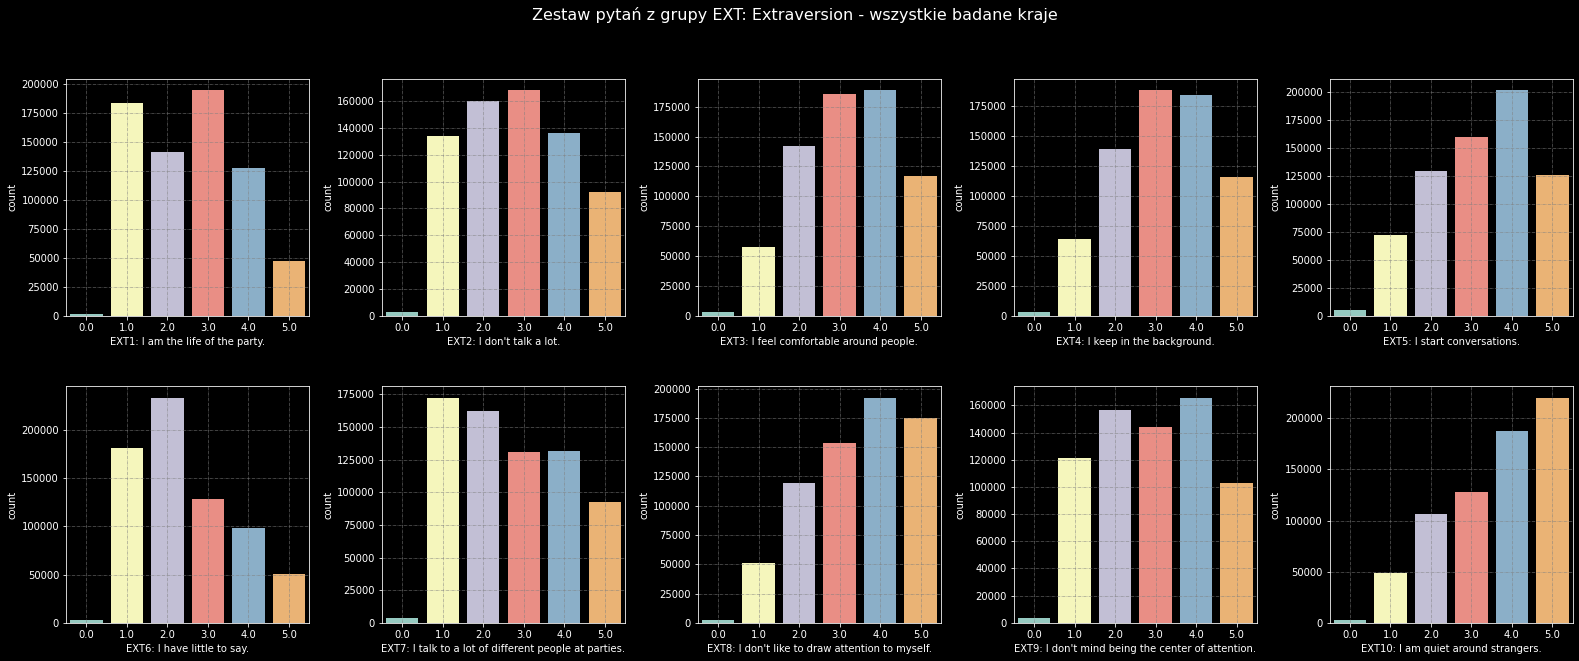

In [65]:
create_countplot(decoded_EXTquestion_dict)

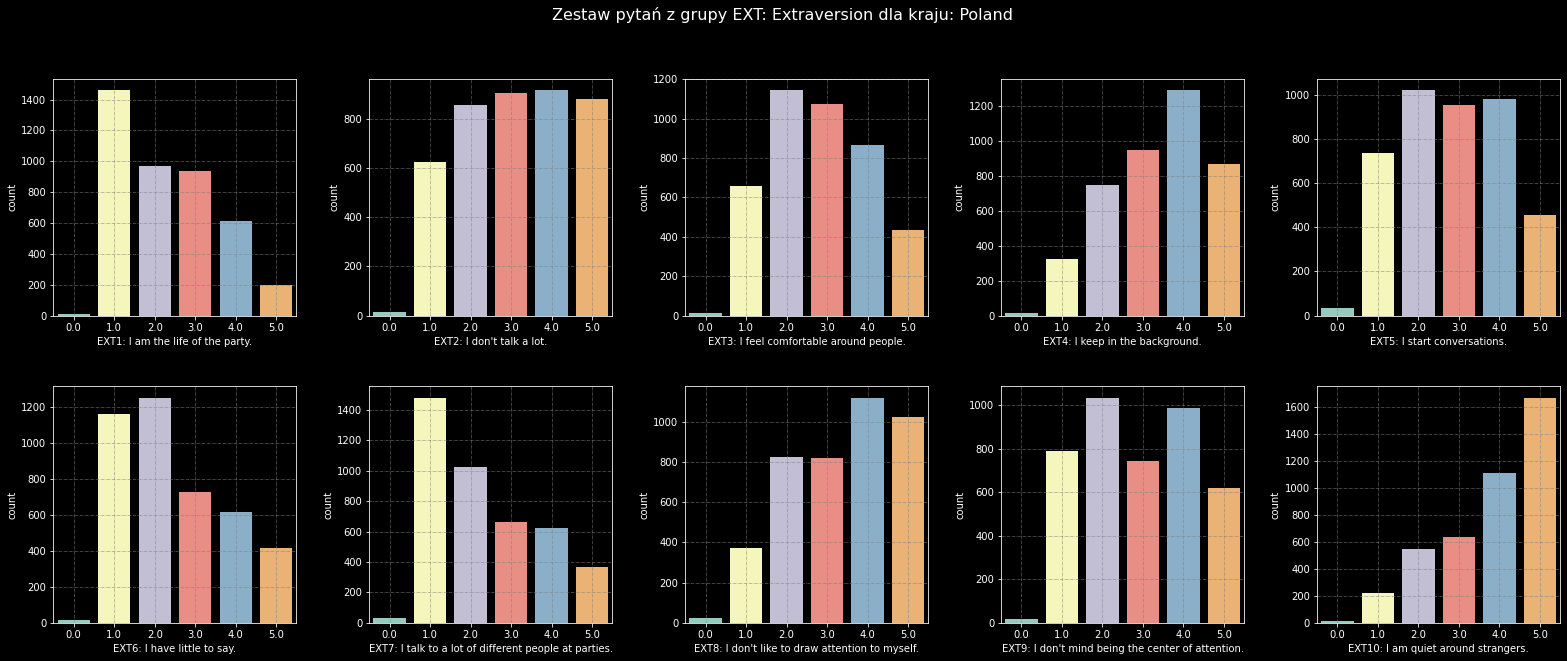

In [66]:
create_countplot(decoded_EXTquestion_dict, country_name='Poland')

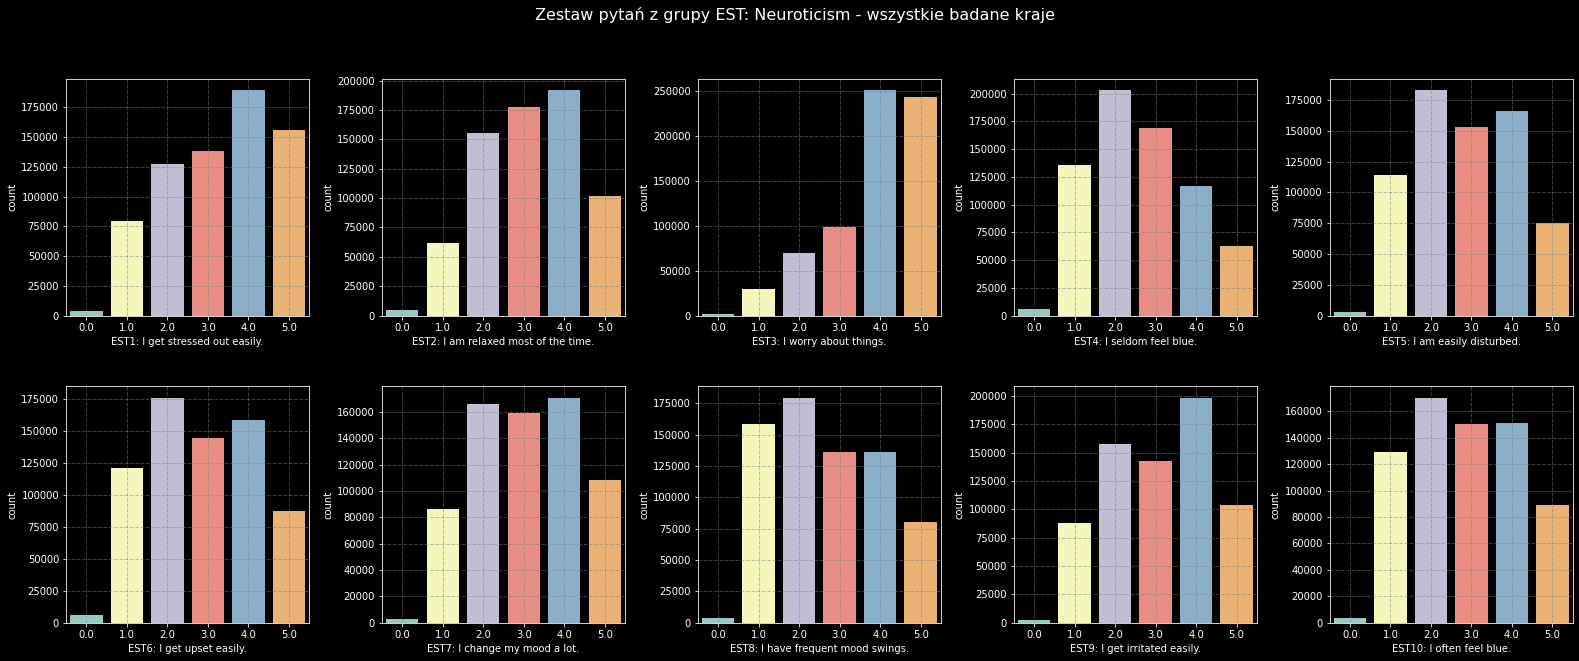

In [67]:
create_countplot(decoded_ESTquestion_dict)

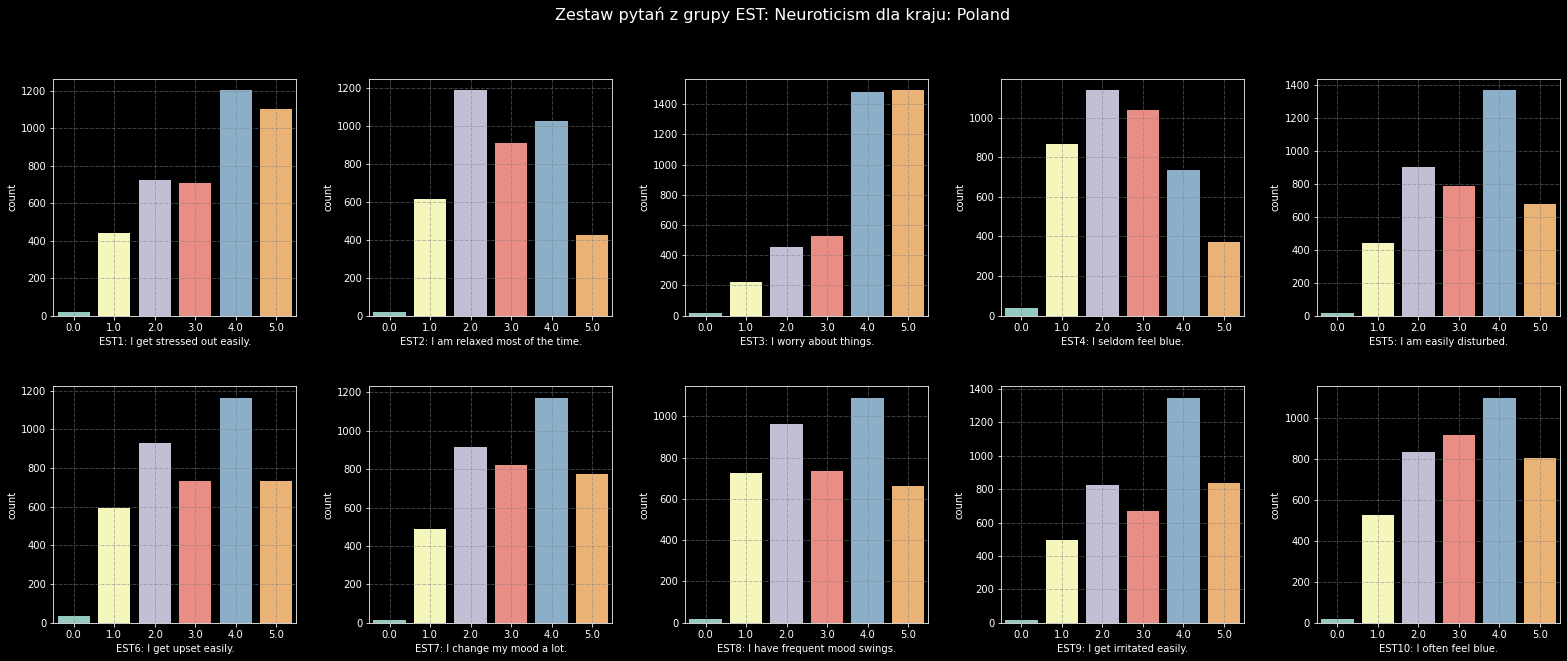

In [68]:
create_countplot(decoded_ESTquestion_dict, country_name='Poland')

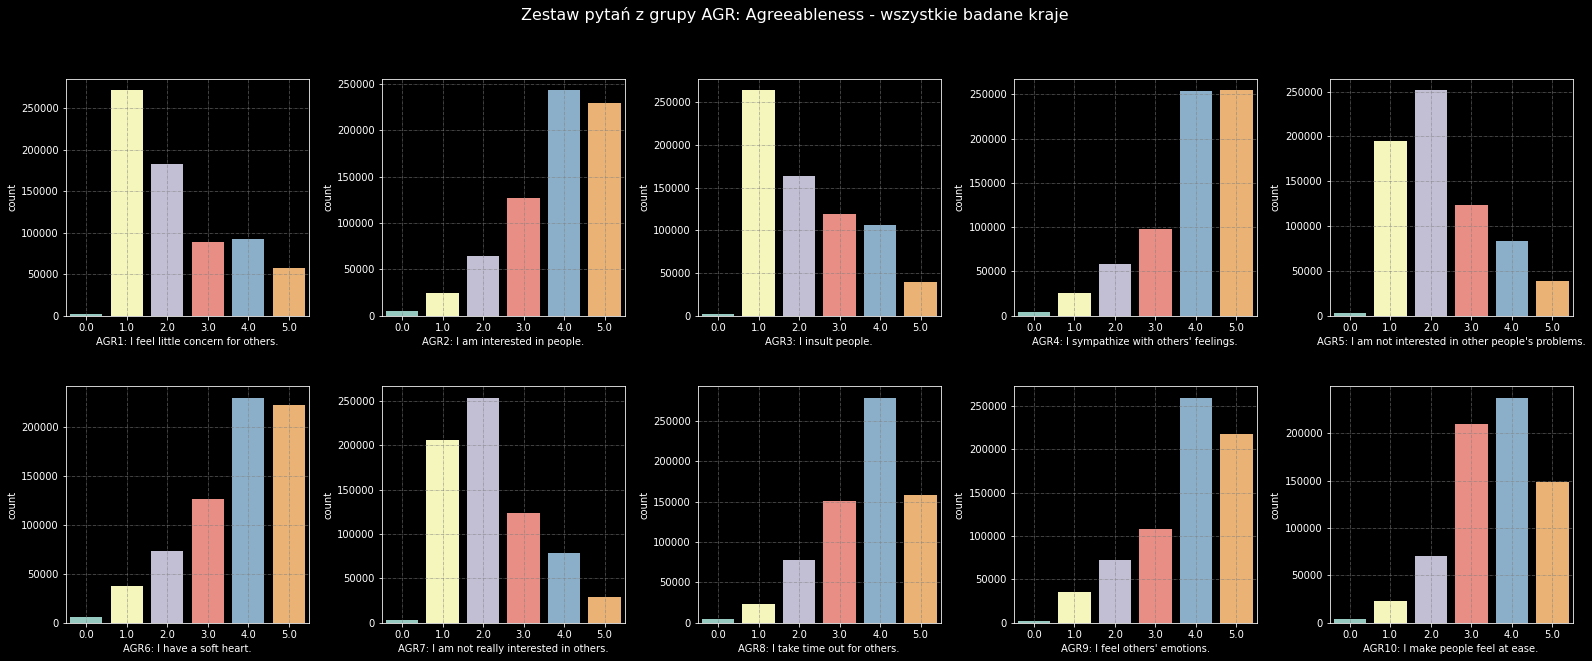

In [69]:
create_countplot(decoded_AGRquestion_dict)

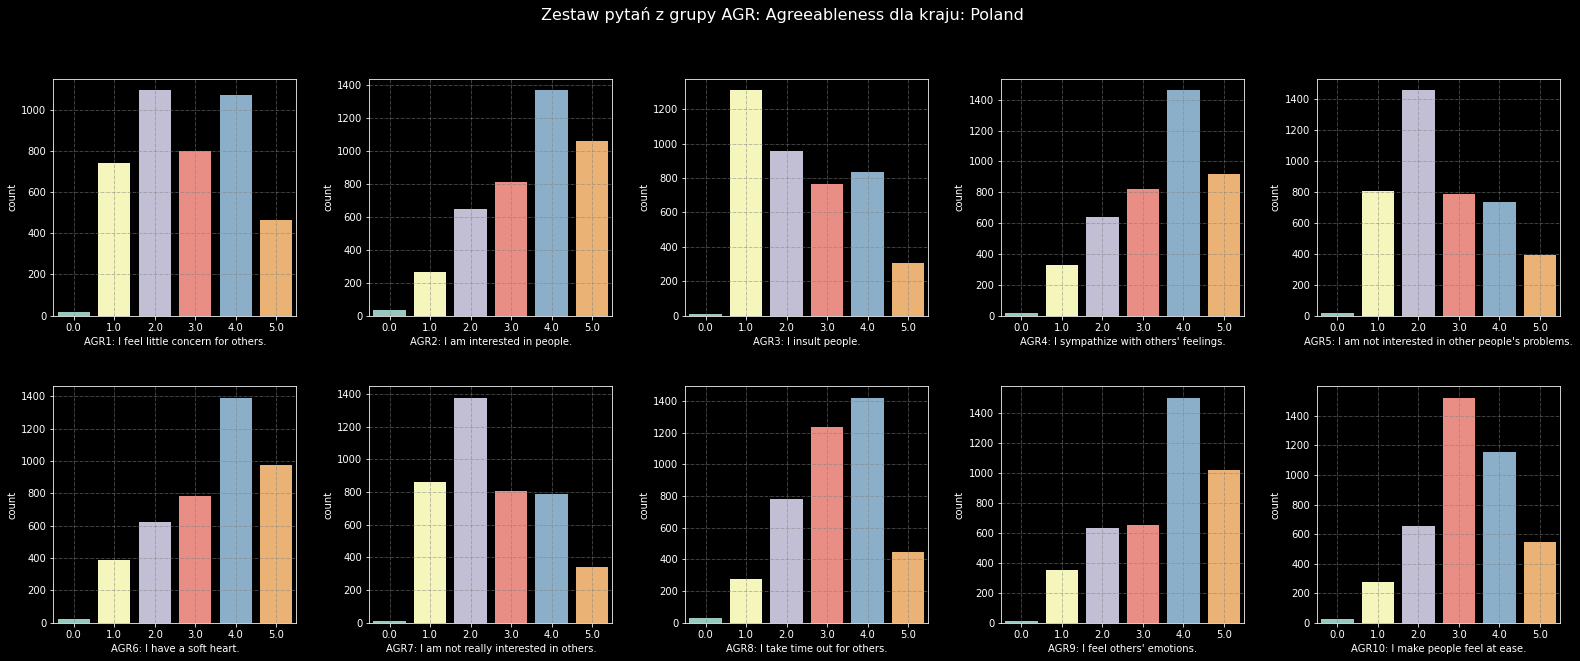

In [70]:
create_countplot(decoded_AGRquestion_dict, country_name='Poland')

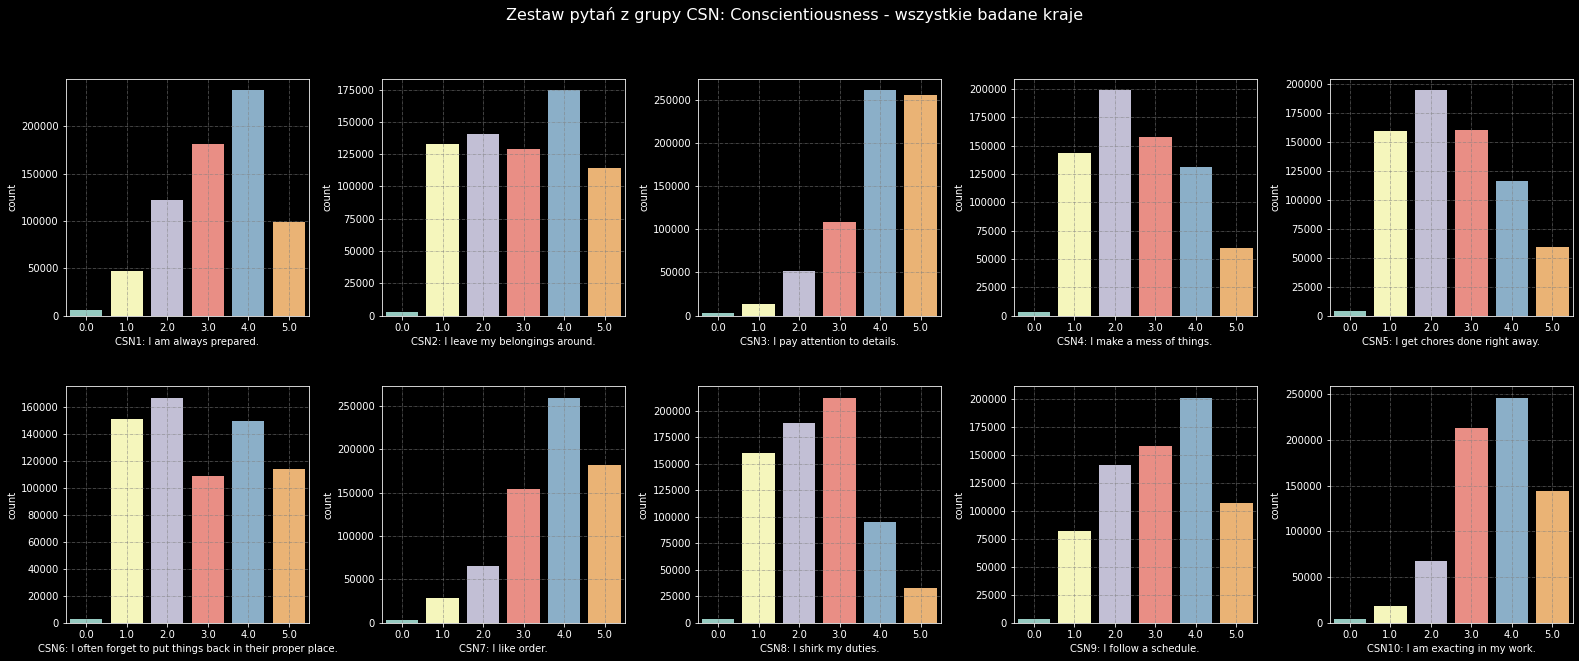

In [71]:
create_countplot(decoded_CSNquestion_dict)

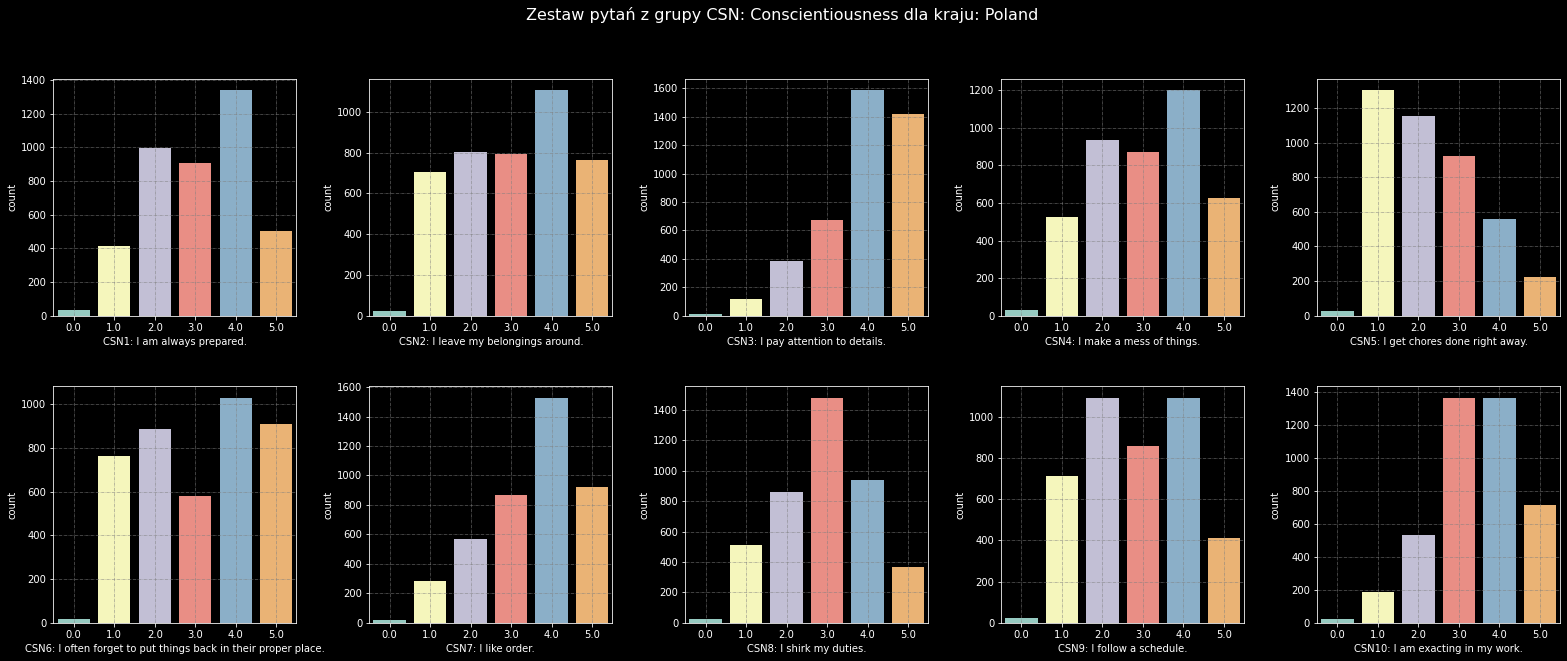

In [72]:
create_countplot(decoded_CSNquestion_dict, country_name='Poland')

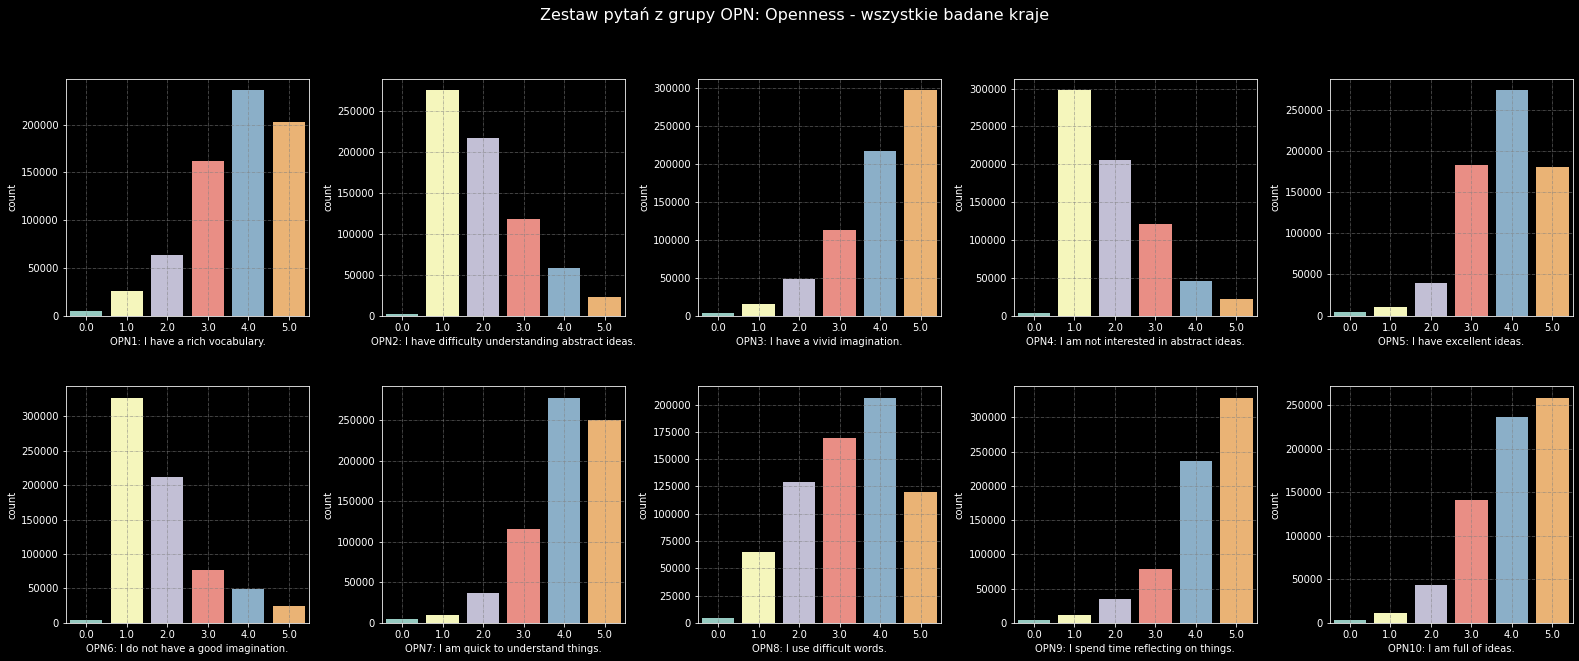

In [73]:
create_countplot(decoded_OPNquestion_dict)

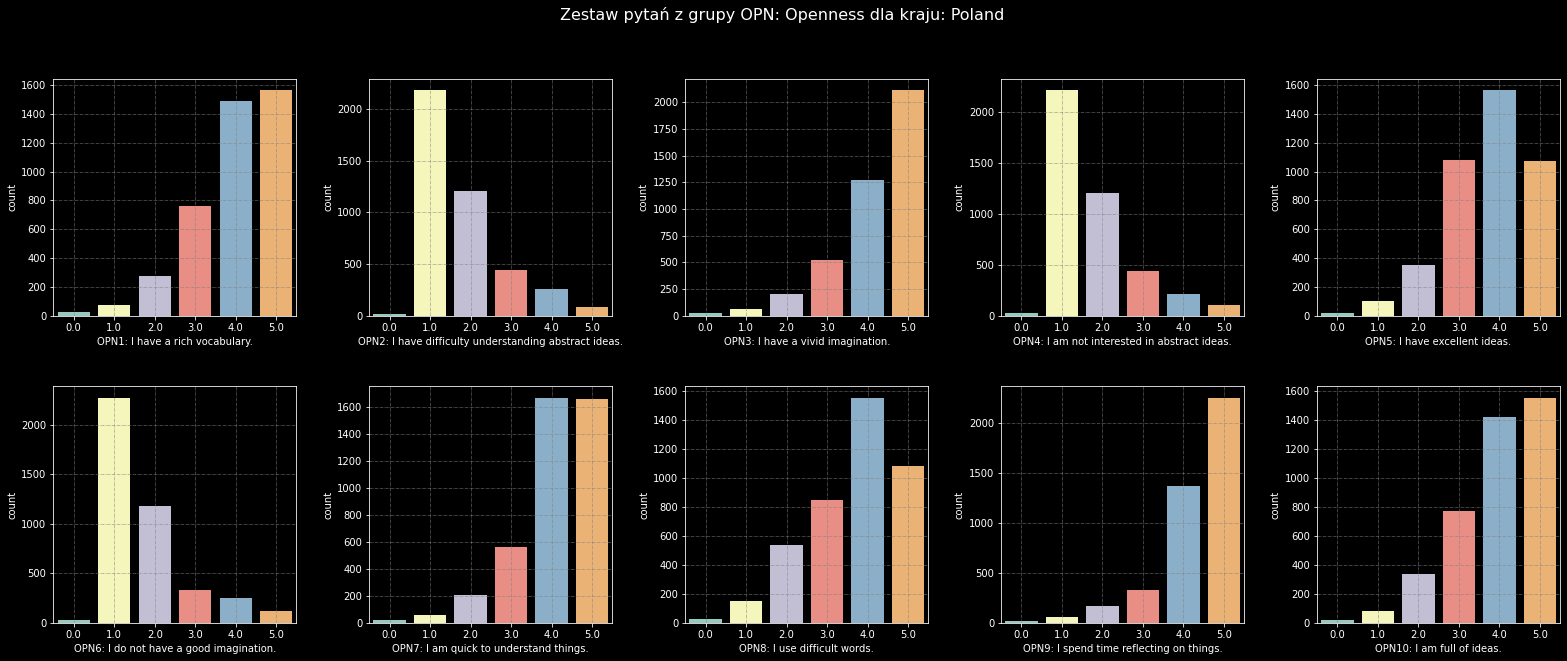

In [74]:
create_countplot(decoded_OPNquestion_dict, country_name='Poland')

## <a name='10'></a>4.2. Analiza korelacji w zbiorze zagadnień z zakresu Extraversion





### <a name='11'></a>4.2.1. Opis oznaczeń dla Factor I - Extraversion  

#### 10-item scale (Alpha = .87) 

|Oznaczenie |Opis |
|--------- |:----|
|**EXT1**	|I am the life of the party.|
|**EXT2**	|I don't talk a lot.|
|**EXT3**	|I feel comfortable around people.|
|**EXT4**	|I keep in the background.|
|**EXT5**	|I start conversations.|
|**EXT6**	|I have little to say.|
|**EXT7**	|I talk to a lot of different people at parties.|
|**EXT8**	|I don't like to draw attention to myself.|
|**EXT9**	|I don't mind being the center of attention.|
|**EXT10** |I am quiet around strangers.|



|Oznaczenie |    + keyed       |Oznaczenie |     – keyed          |  
|------- |------- |:---- |-------          |
|**EXT1** |	Am the life of the party. |**EXT2**| Don't talk a lot.                 |
|**EXT3** |	Feel comfortable around people. |**EXT4** | Keep in the background.             |
|**EXT5** |	Start conversations.|**EXT6** |Have little to say.                     |
|**EXT7** |	Talk to a lot of different people at parties.   |**EXT8** | 	Don't like to draw attention to myself. |
|**EXT9** |	Don't mind being the center of attention.   |**EXT10** |	Am quiet around strangers.     |



### <a name='12'></a>4.2.2. Przygotowanie danych


In [75]:
BigFive.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'dateload', 'introelapse',
       'testelapse', 'endelapse', 'alpha2_code', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err', 'country'],
      dtype='object')

In [76]:
BigFive.columns[-7:][6:] # fajny trick :)

Index(['country'], dtype='object')

In [77]:
def make_factor_df(Factor_columns_names):

  country_col = BigFive.columns[-7:][6:]

  Factor_col_names_with_info = Factor_columns_names.append(country_col)
  Factor_df = BigFive[ Factor_col_names_with_info]
  Factor_df.set_index(['country'], inplace=True)
  Factor_df.sort_index(inplace=True)

  return Factor_df

In [78]:
countries = BigFive['country'].unique()
countries

array(['United Kingdom', 'Malaysia', 'Sweden', 'United States', 'Finland',
       'Ukraine', 'Philippines', 'France', 'Australia', 'India', 'Canada',
       'South Africa', 'Hong Kong', 'Brazil', 'Switzerland', 'Thailand',
       'Italy', 'Spain', 'Croatia', 'Greece', 'Ireland', 'Oman', 'Kenya',
       'Germany', 'Portugal', 'Netherlands', 'Singapore', 'NONE',
       'Romania', 'Bangladesh', 'Brunei Darussalam', 'Norway', 'Nigeria',
       'Lithuania', 'Ethiopia', 'Indonesia', 'Belgium', 'Austria',
       'Denmark', 'Tanzania, United Republic of', 'Luxembourg', 'Poland',
       'Japan', 'Mexico', 'United Arab Emirates', 'Cyprus', 'Uganda',
       'Sri Lanka', 'Turkey', 'Myanmar', 'Colombia', 'Estonia',
       'Argentina', 'Iceland', 'Hungary', 'Puerto Rico', 'Pakistan',
       'Tunisia', 'Latvia', 'Czechia', 'New Zealand', 'Serbia', 'Israel',
       'Jamaica', 'Chile', 'Qatar', 'Saudi Arabia', 'Viet Nam',
       'Mauritius', 'Egypt', 'Peru', 'Bosnia and Herzegovina', 'Slovenia',
      

In [79]:
Factor_I_Extraversion_col_names =  BigFive.columns[:10]
Factor_I_Extraversion_col_names

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10'],
      dtype='object')

In [80]:
Factor_I_Extraversion_df = make_factor_df(Factor_I_Extraversion_col_names)
Factor_I_Extraversion_df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
country,,,,,,,,,,
Afghanistan,3.0,2.0,4.0,3.0,4.0,2.0,1.0,4.0,5.0,5.0
Afghanistan,1.0,2.0,5.0,2.0,5.0,1.0,5.0,4.0,4.0,3.0
Afghanistan,3.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0
Afghanistan,5.0,3.0,4.0,5.0,4.0,2.0,5.0,4.0,3.0,3.0
Afghanistan,4.0,1.0,4.0,3.0,4.0,4.0,1.0,2.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...
Åland Islands,1.0,3.0,2.0,4.0,2.0,2.0,2.0,3.0,3.0,5.0
Åland Islands,4.0,1.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,3.0
Åland Islands,2.0,4.0,2.0,5.0,2.0,1.0,1.0,5.0,4.0,4.0


In [81]:
Factor_I_Extraversion_names_list = ['I am the life\nof the party. (EXT1)',
                                    "I don't talk a lot. (EXT2)",
                                    'I feel comfortable\naround people. (EXT3)',
                                    'I keep\nin the background. (EXT4)',
                                    'I start conversations. (EXT5)',
                                    'I have little\nto say. (EXT6)',
                                    'I talk to a lot of different\npeople at parties. (EXT7)',
                                    "I don't like to\ndraw attention to myself. (EXT8)",
                                    "I don't mind\nbeing the center of attention. (EXT9)",
                                    'I am quiet\naround strangers. (EXT10)']  


Factor_I_Extraversion_names_list             

['I am the life\nof the party. (EXT1)',
 "I don't talk a lot. (EXT2)",
 'I feel comfortable\naround people. (EXT3)',
 'I keep\nin the background. (EXT4)',
 'I start conversations. (EXT5)',
 'I have little\nto say. (EXT6)',
 'I talk to a lot of different\npeople at parties. (EXT7)',
 "I don't like to\ndraw attention to myself. (EXT8)",
 "I don't mind\nbeing the center of attention. (EXT9)",
 'I am quiet\naround strangers. (EXT10)']

### <a name='13'></a>4.2.3. Mapa korelacji dla Extraversion

In [82]:
def make_corr_map(factor_df, factor_col_names, factor_name_list, title):

  factor_to_float = factor_df[factor_col_names].astype('float')
  factor_corr = factor_to_float.corr()

  g = plt.figure(figsize=(12,8))
  g = sns.heatmap(factor_corr, xticklabels= factor_name_list, yticklabels= factor_name_list, annot=True, fmt='.2f', linewidth=.03)
  g.set_xticklabels( g.get_xticklabels(), rotation=45,  horizontalalignment='right', fontweight='light' )
  g.set_title(title, fontsize=18)

  plt.show() 

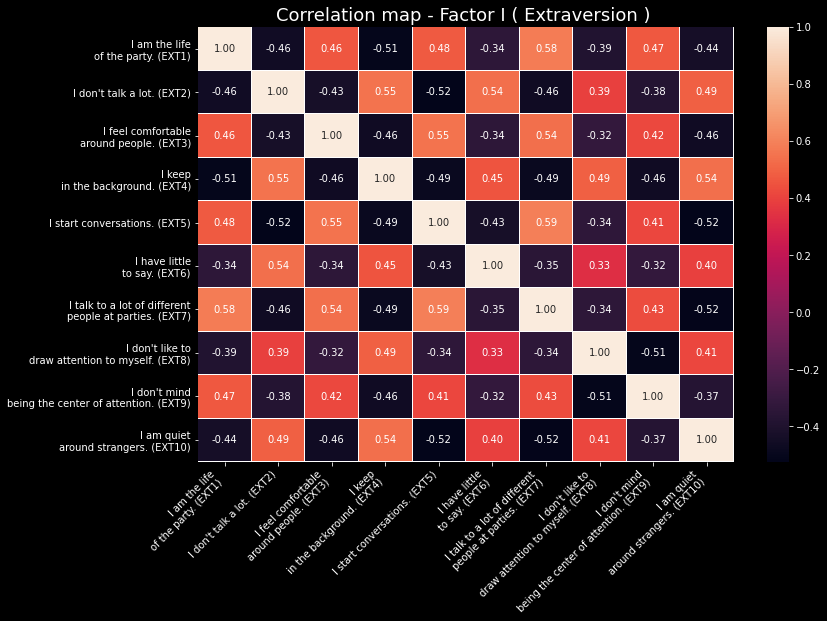

In [83]:
make_corr_map(Factor_I_Extraversion_df,
              Factor_I_Extraversion_col_names,
              Factor_I_Extraversion_names_list,
              title='Correlation map - Factor I ( Extraversion ) ')

## <a name='14'></a>4.3 Analiza korelacji w zbiorze zagadnień z zakresu Agreeableness

### <a name='15'></a>4.3.1. Opis oznaczeń dla Factor II - Agreeableness  

#### 10-item scale (Alpha = .82)

|Oznaczenie |Opis |
|--------- |:----|
|**AGR1**	|I feel little concern for others.|
|**AGR2**	|I am interested in people.|
|**AGR3**	|I insult people.|
|**AGR4**	|I sympathize with others' feelings.|
|**AGR5**	|I am not interested in other people's problems.|
|**AGR6**	|I have a soft heart.|
|**AGR7**	|I am not really interested in others.|
|**AGR8**	|I take time out for others.|
|**AGR9**	|I feel others' emotions.|
|**AGR10**	|I make people feel at ease.|


|Oznaczenie |    + keyed       |Oznaczenie |     – keyed          |  
|------- |------- |:---- |-------          |
|**AGR2**| I am interested in people. |**AGR1** |I feel little concern for others.               |
|**AGR4** | I sympathize with others' feelings.            |**AGR3** |	I insult people |
|**AGR6** |I have a soft heart.|**AGR5** |	I am not interested in other people's problems.|
|**AGR8** | I take time out for others.|**AGR7** |	I am not really interested in others.   |
|**AGR9** |I feel others' emotions.|
|**AGR10** |	I make people feel at ease.|





### <a name='16'></a>4.3.2. Przygotowanie danych

In [84]:
BigFive.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'dateload', 'introelapse',
       'testelapse', 'endelapse', 'alpha2_code', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err', 'country'],
      dtype='object')

In [85]:
info_cols = BigFive.columns[-7:-2]
info_cols

Index(['introelapse', 'testelapse', 'endelapse', 'alpha2_code',
       'lat_appx_lots_of_err'],
      dtype='object')

In [86]:
Factor_II_Agreeableness_col_names =  BigFive.columns[20:30]
Factor_II_Agreeableness_col_names

Index(['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9',
       'AGR10'],
      dtype='object')

In [87]:
Factor_II_Agreeableness_df = make_factor_df(Factor_II_Agreeableness_col_names)
Factor_II_Agreeableness_df

,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10
country,,,,,,,,,,
Afghanistan,4.0,4.0,3.0,4.0,2.0,1.0,1.0,4.0,4.0,4.0
Afghanistan,4.0,1.0,4.0,3.0,3.0,1.0,3.0,4.0,3.0,1.0
Afghanistan,3.0,5.0,1.0,4.0,4.0,5.0,3.0,3.0,4.0,4.0
Afghanistan,5.0,5.0,4.0,0.0,5.0,3.0,4.0,4.0,5.0,2.0
Afghanistan,2.0,4.0,1.0,5.0,2.0,5.0,2.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...
Åland Islands,2.0,3.0,4.0,2.0,4.0,4.0,3.0,2.0,2.0,2.0
Åland Islands,4.0,5.0,4.0,4.0,1.0,4.0,2.0,4.0,5.0,3.0
Åland Islands,4.0,2.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,3.0


In [88]:
Factor_II_Agreeableness_names_list = [
                                    "I feel little concern\nfor others. (AGR1)",
                                    "I am interested\nin people. (AGR2)",
                                    "I insult people. (AGR3)", 
                                    "I sympathize with\nothers' feelings. (AGR4)",
                                    "I am not interested in\nother people's problems. (AGR5)", 
                                    "I have\na soft heart. (AGR6)", 
                                    "I am not really\ninterested in others. (AGR7)",
                                    "I take time out\nfor others. (AGR8)",
                                    "I feel others'\nemotions. (AGR9)",
                                    "I make people\nfeel at ease. (AGR10)"
                                    ]                              

Factor_II_Agreeableness_names_list

['I feel little concern\nfor others. (AGR1)',
 'I am interested\nin people. (AGR2)',
 'I insult people. (AGR3)',
 "I sympathize with\nothers' feelings. (AGR4)",
 "I am not interested in\nother people's problems. (AGR5)",
 'I have\na soft heart. (AGR6)',
 'I am not really\ninterested in others. (AGR7)',
 'I take time out\nfor others. (AGR8)',
 "I feel others'\nemotions. (AGR9)",
 'I make people\nfeel at ease. (AGR10)']

### <a name='17'></a>4.3.3. Mapa korelacji dla Agreeableness

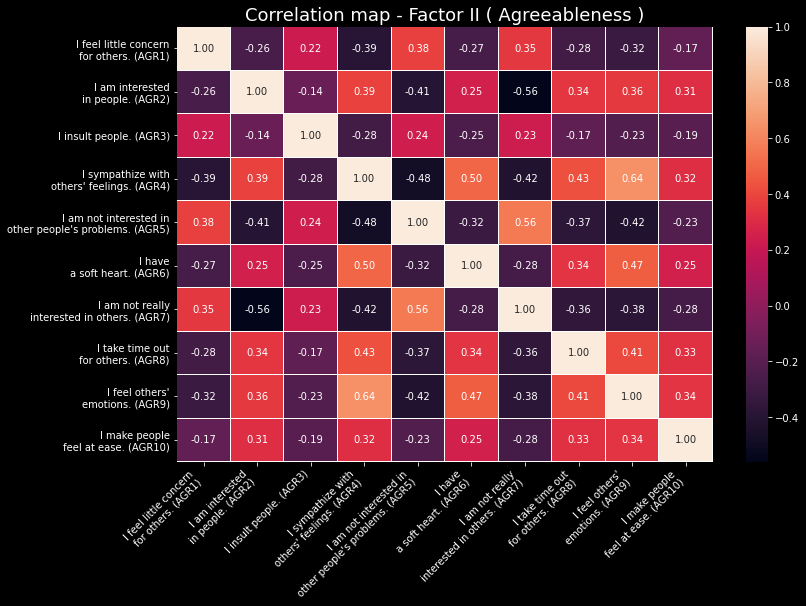

In [89]:
make_corr_map(Factor_II_Agreeableness_df, Factor_II_Agreeableness_col_names,
              Factor_II_Agreeableness_names_list,
              title="Correlation map - Factor II ( Agreeableness )")

## <a name='18'></a>4.4 Analiza korelacji w zbiorze zagadnień z zakresu Conscientiousness

### <a name='19'></a>4.4.1. Opis oznaczeń dla Factor III - Conscientiousness


#### 10-item scale (Alpha = .79)

|Oznaczenie |Opis |
|--------- |:----|
|**CSN1**	|I am always prepared.|
|**CSN2**	|I leave my belongings around.|
|**CSN3**	|I pay attention to details.|
|**CSN4**	|I make a mess of things.|
|**CSN5**	|I get chores done right away.|
|**CSN6**	|I often forget to put things back in their proper place.|
|**CSN7**	|I like order.|
|**CSN8**	|I shirk my duties.|
|**CSN9**	|I follow a schedule.|
|**CSN10**|I am exacting in my work.|



|Oznaczenie |    + keyed       |Oznaczenie |     – keyed          |  
|------- |------- |:---- |-------          |
|**CSN1**|	Am always prepared. |**CSN2**| Leave my belongings around.|
|**CSN3**|	Pay attention to details.  |**CSN4**|Make a mess of things.|
|**CSN5**|	Get chores done right away.   |**CSN6**|Often forget to put things back in their proper place.                 |
|**CSN7**|	Like order.  |**CSN8**| Shirk my duties.   |
|**CSN9**|	Follow a schedule. | 	    |
|**CSN10**| Am exacting in my work. |  | 

### <a name='20'></a>4.4.2. Przygotowanie danych

In [90]:
Factor_III_Conscientiousness_col_names =  BigFive.columns[30:40]
Factor_III_Conscientiousness_col_names

Index(['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9',
       'CSN10'],
      dtype='object')

In [91]:
Factor_III_Conscientiousness_df = make_factor_df(Factor_III_Conscientiousness_col_names)
Factor_III_Conscientiousness_df

,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10
country,,,,,,,,,,
Afghanistan,3.0,5.0,5.0,5.0,3.0,5.0,5.0,2.0,2.0,3.0
Afghanistan,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,4.0,5.0
Afghanistan,4.0,3.0,4.0,4.0,3.0,4.0,2.0,4.0,3.0,3.0
Afghanistan,5.0,4.0,5.0,5.0,4.0,3.0,4.0,3.0,5.0,1.0
Afghanistan,1.0,2.0,5.0,3.0,4.0,1.0,4.0,4.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...
Åland Islands,1.0,4.0,3.0,4.0,1.0,3.0,4.0,5.0,1.0,3.0
Åland Islands,1.0,5.0,3.0,4.0,1.0,5.0,1.0,5.0,2.0,2.0
Åland Islands,1.0,1.0,4.0,4.0,1.0,2.0,5.0,4.0,1.0,4.0


In [92]:
Factor_III_Conscientiousness_names_list = [
                                    "I am always\nprepared. (CSN1)",
                                    "I leave my\nbelongings around. (CSN2)",
                                    "I pay attention\nto details. (CSN3)", 
                                    "I make a mess\nof things. (CSN4)",
                                    "I get chores done\nright away. (CSN5)", 
                                    "I often forget to put\nthings back\nin their proper place. (CSN6)", 
                                    "I like order. (CSN7)",
                                    "I shirk\nmy duties. (CSN8)",
                                    "I follow\na schedule. (CSN9)",
                                    "I am exacting\nin my work. (CSN10)"
                                    ]

Factor_III_Conscientiousness_names_list

['I am always\nprepared. (CSN1)',
 'I leave my\nbelongings around. (CSN2)',
 'I pay attention\nto details. (CSN3)',
 'I make a mess\nof things. (CSN4)',
 'I get chores done\nright away. (CSN5)',
 'I often forget to put\nthings back\nin their proper place. (CSN6)',
 'I like order. (CSN7)',
 'I shirk\nmy duties. (CSN8)',
 'I follow\na schedule. (CSN9)',
 'I am exacting\nin my work. (CSN10)']

### <a name='21'></a>4.4.3. Mapa korelacji dla Conscientiousness

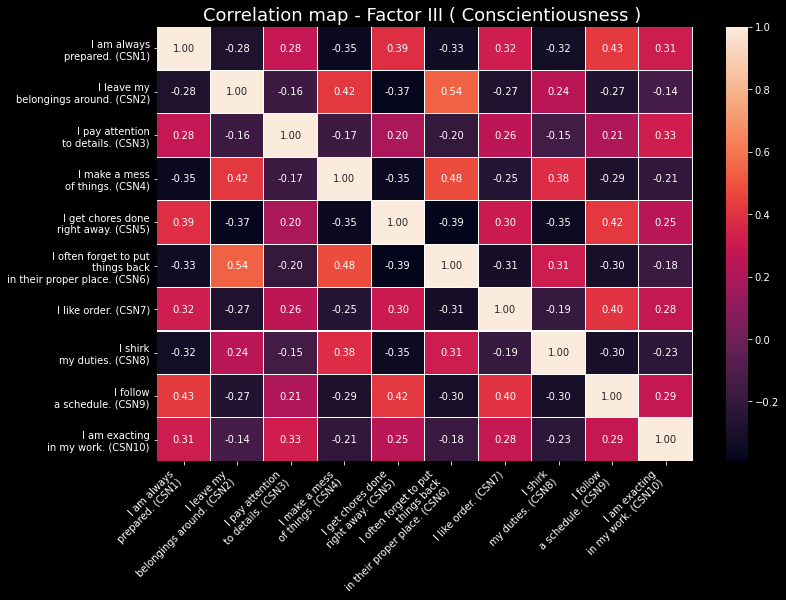

In [93]:
make_corr_map(Factor_III_Conscientiousness_df,
              Factor_III_Conscientiousness_col_names,
              Factor_III_Conscientiousness_names_list,
              title='Correlation map - Factor III ( Conscientiousness ) ')

## <a name='22'></a>4.5 Analiza korelacji w zbiorze zagadnień z zakresu Emotional Stability (Neuroticism)

### <a name='23'></a>4.5.1. Opis oznaczeń dla Factor IV - Emotional Stability (Neuroticism) 


#### 10-item scale (Alpha = .86)


|Oznaczenie |Opis |
|--------- |:----|
|**EST1**	|I get stressed out easily.|
|**EST2**	|I am relaxed most of the time.|
|**EST3**	|I worry about things.|
|**EST4**	|I seldom feel blue.|
|**EST5** |I am easily disturbed.|
|**EST6**	|I get upset easily.|
|**EST7**	|I change my mood a lot.|
|**EST8**	|I have frequent mood swings.|
|**EST9**	|I get irritated easily.|
|**EST10** |I often feel blue.|


|Oznaczenie |    + keyed       |Oznaczenie |     – keyed          |  
|------- |------- |:---- |-------          |
|**EST2**|I am relaxed most of the time. |**EST1**|I get stressed out easily.|
|**EST4**|I seldom feel blue.|**EST3**|I worry about things.|
|||**EST5**|I am easily disturbed.|
|||**EST6**|I get upset easily.|
|||**EST7**|I change my mood a lot.| 	    
|||**EST8**|I have frequent mood swings.|  
|||**EST9**	|I get irritated easily.|
|||**EST10** |I often feel blue.|


### <a name='24'></a>4.5.2. Przygotowanie danych


In [94]:
Factor_IV_EmotionalStability_col_names =  BigFive.columns[10:20]
Factor_IV_EmotionalStability_col_names

Index(['EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9',
       'EST10'],
      dtype='object')

In [95]:
Factor_IV_EmotionalStability_df = make_factor_df(Factor_IV_EmotionalStability_col_names)
Factor_IV_EmotionalStability_df

,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10
country,,,,,,,,,,
Afghanistan,2.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0
Afghanistan,4.0,1.0,5.0,2.0,4.0,4.0,4.0,4.0,4.0,2.0
Afghanistan,4.0,5.0,4.0,3.0,5.0,5.0,3.0,2.0,4.0,4.0
Afghanistan,4.0,4.0,5.0,4.0,3.0,4.0,4.0,2.0,4.0,2.0
Afghanistan,1.0,4.0,4.0,4.0,2.0,2.0,4.0,5.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...
Åland Islands,5.0,3.0,3.0,1.0,4.0,3.0,5.0,5.0,4.0,5.0
Åland Islands,2.0,3.0,5.0,2.0,4.0,5.0,4.0,5.0,4.0,3.0
Åland Islands,5.0,3.0,5.0,3.0,4.0,5.0,4.0,4.0,5.0,4.0


In [96]:
Factor_IV_EmotionalStability_names_list = [
                                    "I get stressed\nout easily. (EST1)",
                                    "I am relaxed\nmost of the time. (EST2)",
                                    "I worry\nabout things. (EST3)", 
                                    "I seldom\nfeel blue. (EST4)",
                                    "I am easily\ndisturbed. (EST5)", 
                                    "I get upset\neasily. (EST6)", 
                                    "I change my mood\na lot. (EST7)",
                                    "I have frequent\nmood swings. (EST8)",
                                    "I get irritated\neasily. (EST9)",
                                    "I often\nfeel blue. (EST10)"
                                    ]

Factor_IV_EmotionalStability_names_list

['I get stressed\nout easily. (EST1)',
 'I am relaxed\nmost of the time. (EST2)',
 'I worry\nabout things. (EST3)',
 'I seldom\nfeel blue. (EST4)',
 'I am easily\ndisturbed. (EST5)',
 'I get upset\neasily. (EST6)',
 'I change my mood\na lot. (EST7)',
 'I have frequent\nmood swings. (EST8)',
 'I get irritated\neasily. (EST9)',
 'I often\nfeel blue. (EST10)']

### <a name='25'></a>4.5.3. Mapa korelacji dla Emotional Stability (Neuroticism)

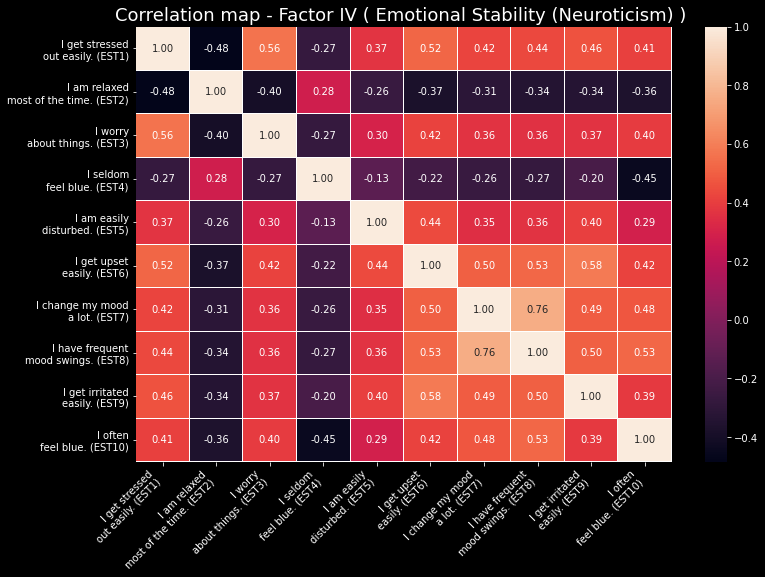

In [97]:
make_corr_map(Factor_IV_EmotionalStability_df,
              Factor_IV_EmotionalStability_col_names,
              Factor_IV_EmotionalStability_names_list,
              title='Correlation map - Factor IV ( Emotional Stability (Neuroticism) ) ')

## <a name='26'></a>4.6 Analiza korelacji w zbiorze zagadnień z zakresu Intellect / Imagination (Openness)

### <a name='27'></a>4.6.1. Opis oznaczeń dla Factor V - Intellect or Imagination (Openness)


#### 10-item scale (Alpha = .84)


|Oznaczenie |Opis |
|--------- |:----|
|**OPN1**	|I have a rich vocabulary.|
|**OPN2**	|I have difficulty understanding abstract ideas.|
|**OPN3**	|I have a vivid imagination.|
|**OPN4**	|I am not interested in abstract ideas.|
|**OPN5** |I have excellent ideas.|
|**OPN6**	|I do not have a good imagination.|
|**OPN7**	|I am quick to understand things.|
|**OPN8**	|I use difficult words.|
|**OPN9**	|I spend time reflecting on things.|
|**OPN10** |I am full of ideas.|


|Oznaczenie |    + keyed       |Oznaczenie |     – keyed          |  
|------- |------- |:---- |-------          |
|**OPN1**|I have a rich vocabulary.|**OPN2**|I have difficulty understanding abstract ideas.|
|**OPN3**|I have a vivid imagination.|**OPN4**|I am not interested in abstract ideas..|
|**OPN5**|I have excellent ideas.|**OPN6**|I do not have a good imagination.|
|**OPN7**|I am quick to understand things.|||
|**OPN8**|I use difficult words.||| 	    
|**OPN9**|I spend time reflecting on things.|||  
|**OPN10**	|I am full of ideas.|||



### <a name='28'></a>4.6.2. Przygotowanie danych

In [98]:
Factor_V_Openness_col_names =  BigFive.columns[40:50]
Factor_V_Openness_col_names

Index(['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9',
       'OPN10'],
      dtype='object')

In [99]:
Factor_V_Openness_df = make_factor_df(Factor_V_Openness_col_names)
Factor_V_Openness_df

,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
country,,,,,,,,,,
Afghanistan,4.0,3.0,4.0,3.0,4.0,2.0,5.0,2.0,4.0,4.0
Afghanistan,5.0,1.0,5.0,3.0,3.0,1.0,5.0,5.0,5.0,4.0
Afghanistan,2.0,4.0,4.0,3.0,4.0,4.0,4.0,3.0,4.0,5.0
Afghanistan,4.0,1.0,4.0,5.0,3.0,3.0,5.0,1.0,4.0,3.0
Afghanistan,1.0,2.0,5.0,2.0,4.0,5.0,4.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...
Åland Islands,2.0,4.0,2.0,4.0,2.0,2.0,4.0,2.0,3.0,3.0
Åland Islands,3.0,2.0,4.0,3.0,3.0,2.0,2.0,3.0,4.0,3.0
Åland Islands,5.0,1.0,4.0,1.0,5.0,2.0,4.0,4.0,5.0,5.0


In [100]:
Factor_V_Openness_names_list = [
                                    "I have a rich\nvocabulary. (OPN1)",
                                    "I have difficulty understanding\nabstract ideas. (OPN2)",
                                    "I have a vivid\nimagination. (OPN3)", 
                                    "I am not interested in\nabstract ideas. (OPN4)",
                                    "I have excellent\nideas. (OPN5)", 
                                    "I do not have a good\nimagination. (OPN6)", 
                                    "I am quick to\nunderstand things. (OPN7)",
                                    "I use difficult\nwords. (OPN8)",
                                    "I spend time reflecting on\nthings. (OPN9)",
                                    "I am full of\nideas. (OPN10)"
                                    ]

Factor_V_Openness_names_list

['I have a rich\nvocabulary. (OPN1)',
 'I have difficulty understanding\nabstract ideas. (OPN2)',
 'I have a vivid\nimagination. (OPN3)',
 'I am not interested in\nabstract ideas. (OPN4)',
 'I have excellent\nideas. (OPN5)',
 'I do not have a good\nimagination. (OPN6)',
 'I am quick to\nunderstand things. (OPN7)',
 'I use difficult\nwords. (OPN8)',
 'I spend time reflecting on\nthings. (OPN9)',
 'I am full of\nideas. (OPN10)']

### <a name='29'></a>4.6.3. Mapa korelacji dla Intellect or Imagination (Openness)

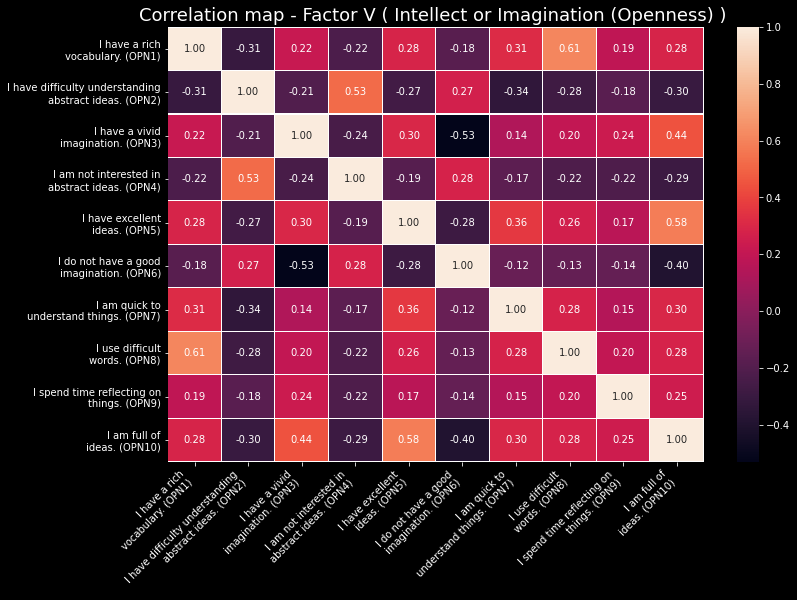

In [101]:
make_corr_map( Factor_V_Openness_df,
               Factor_V_Openness_col_names,
               Factor_V_Openness_names_list,
               title='Correlation map - Factor V ( Intellect or Imagination (Openness) ) ')

## <a name='30'></a>4.7 Państwa o najwyższym poziomie Extraversion


|Oznaczenie |    + keyed       |Oznaczenie |     – keyed          |  
|------- |------- |:---- |-------          |
|**EXT1** |	Am the life of the party. |**EXT2**| Don't talk a lot.                 |
|**EXT3** |	Feel comfortable around people. |**EXT4** | Keep in the background.             |
|**EXT5** |	Start conversations.|**EXT6** |Have little to say.                     |
|**EXT7** |	Talk to a lot of different people at parties.   |**EXT8** | 	Don't like to draw attention to myself. |
|**EXT9** |	Don't mind being the center of attention.   |**EXT10** |	Am quiet around strangers.     |


In [102]:
Factor_I_Extraversion_df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
country,,,,,,,,,,
Afghanistan,3.0,2.0,4.0,3.0,4.0,2.0,1.0,4.0,5.0,5.0
Afghanistan,1.0,2.0,5.0,2.0,5.0,1.0,5.0,4.0,4.0,3.0
Afghanistan,3.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,4.0
Afghanistan,5.0,3.0,4.0,5.0,4.0,2.0,5.0,4.0,3.0,3.0
Afghanistan,4.0,1.0,4.0,3.0,4.0,4.0,1.0,2.0,5.0,5.0


In [103]:
best_EXT1_filter = Factor_I_Extraversion_df['EXT1'] == 5
best_EXT3_filter = Factor_I_Extraversion_df['EXT3'] == 5
best_EXT5_filter = Factor_I_Extraversion_df['EXT5'] == 5
best_EXT7_filter = Factor_I_Extraversion_df['EXT7'] == 5
best_EXT9_filter = Factor_I_Extraversion_df['EXT9'] == 5

best_EXT_filter = best_EXT1_filter & best_EXT3_filter & best_EXT5_filter & best_EXT7_filter & best_EXT9_filter



Country_with_best_Extraversion = Factor_I_Extraversion_df[ best_EXT_filter ]
Country_with_best_Extraversion.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10
country,,,,,,,,,,
Afghanistan,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,2.0
Albania,5.0,1.0,5.0,3.0,5.0,1.0,5.0,1.0,5.0,1.0
Albania,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
Algeria,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,2.0
Argentina,5.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0


In [104]:
Country_with_best_Extraversion.reset_index(inplace=True)

In [105]:
Country_with_best_Extraversion_valCounts = Country_with_best_Extraversion['country'].value_counts().rename_axis('country').to_frame('ValueCounts')
Country_with_best_Extraversion_valCounts

,ValueCounts
country,
United States,6526
Canada,641
United Kingdom,625
Australia,434
India,297
...,...
Bahrain,1
Morocco,1
Kyrgyzstan,1


In [106]:
Country_with_best_Extraversion_valCounts.reset_index(inplace=True)

In [107]:
Country_with_best_Extraversion_valCounts_sortedGreatherThan100 = Country_with_best_Extraversion_valCounts['ValueCounts'] >= 50

Country_with_best_Extraversion_valCounts_sorted = Country_with_best_Extraversion_valCounts[Country_with_best_Extraversion_valCounts_sortedGreatherThan100]
Country_with_best_Extraversion_valCounts_sorted

,country,ValueCounts
0,United States,6526
1,Canada,641
2,United Kingdom,625
3,Australia,434
4,India,297
5,NONE,159
6,Philippines,142
7,Germany,117
8,Sweden,115
9,Norway,101


In [108]:
Country_with_best_Extraversion_valCounts_sorted.drop(axis='rows', labels=5, inplace=True )
Country_with_best_Extraversion_valCounts_sorted.head()

,country,ValueCounts
0,United States,6526
1,Canada,641
2,United Kingdom,625
3,Australia,434
4,India,297


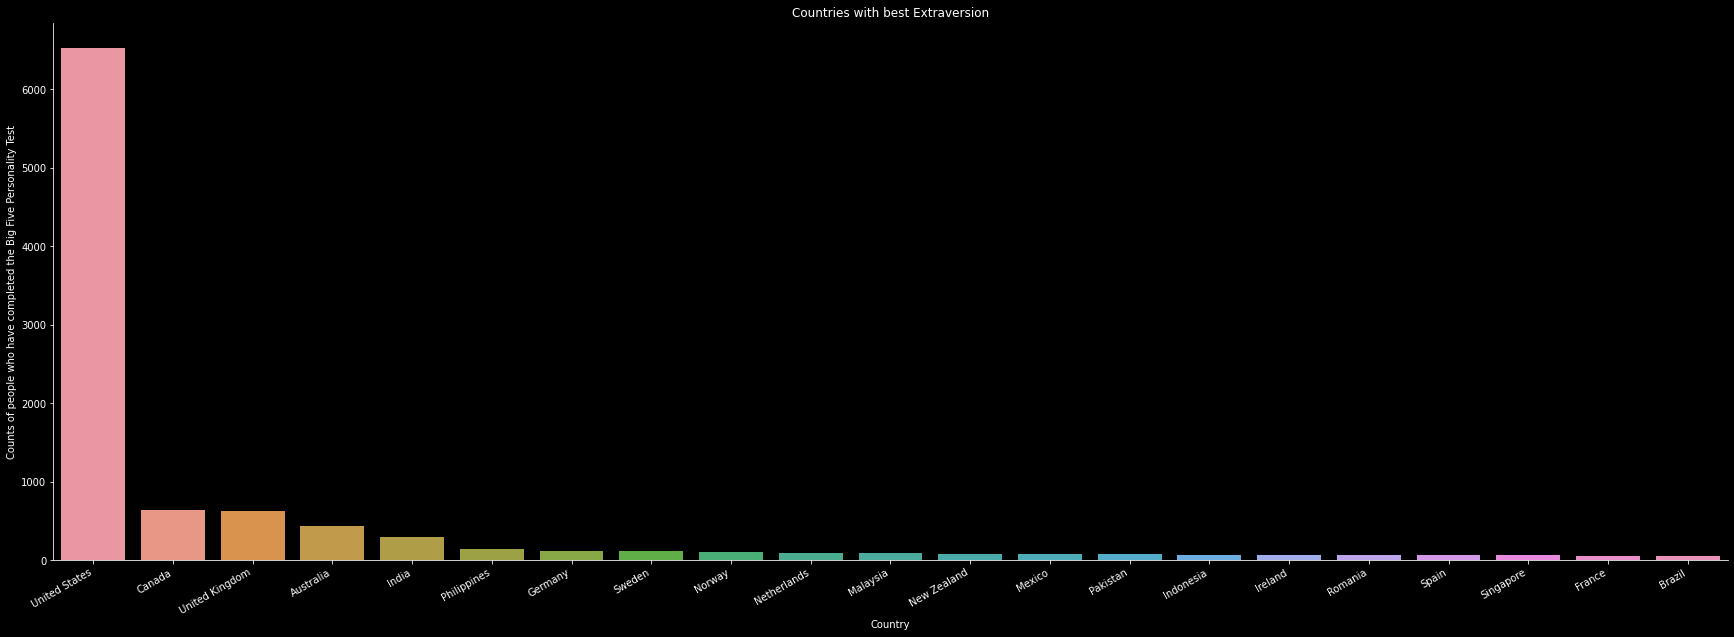

In [109]:
g = sns.catplot(x='country', y='ValueCounts', data=Country_with_best_Extraversion_valCounts_sorted, kind='bar', height=8, aspect=3)
g.set_xticklabels( rotation=30,  horizontalalignment='right', fontweight='light' )
g.set(title= 'Countries with best Extraversion',
      xlabel='Country',
      ylabel='Counts of people who have completed the Big Five Personality Test',
      )


## <a name='31'></a>4.8 Diagram typu radar dla wybranego wiersza


In [120]:
BigFive.head(3)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,dateload,introelapse,testelapse,endelapse,alpha2_code,lat_appx_lots_of_err,long_appx_lots_of_err,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2016-03-03 02:01:01,9.0,234.0,6,GB,51.5448,0.1991,United Kingdom
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,2016-03-03 02:01:20,12.0,179.0,11,MY,3.1698,101.706,Malaysia
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,2016-03-03 02:01:56,3.0,186.0,7,GB,54.9119,-1.3833,United Kingdom


In [111]:
Factors_list = [Factor_I_Extraversion_names_list,
                Factor_II_Agreeableness_names_list,
                Factor_III_Conscientiousness_names_list,
                Factor_IV_EmotionalStability_names_list,
                Factor_V_Openness_names_list
                ]

In [112]:
BigFive.columns[-1:]

Index(['country'], dtype='object')

In [113]:
def make_radar(factor_scores ):

  scale_ticks = ['No\nanswer', 'Disagree', 'slightly\ndisagree',
                 'Neutral', 'Slightly\nagree', 'Agree']

  title_list = ['Factor I - Extraversion',
                'Factor II - Agreeableness',
                'Factor III - Conscientiousness',
                'Factor IV - Emotional Stability (Neuroticism)',
                'Factor V - Intellect or Imagination (Openness)'] 
           
  color_list = ['green', 'blue', 'yellow', 'red', 'purple']

  cols     = 2
  rows     = 3
  titleNo  = 0
  ColorNo  = 0
  FactorNo = 0

  fig= plt.figure(figsize=(28, 28) )
  fig.subplots_adjust(hspace=0.2, wspace=0.1)

  for i, start, stop in zip( range(1, 6), range(0, 50, 10), range(10, 60, 10)):
    ax = fig.add_subplot(rows, cols, i, polar=True)
    setTitle = [ title for title in title_list ][titleNo]
    setColor= [ color for color in color_list ][ColorNo]

    iterator = islice(first_row_scores, start, stop )
    factor_scores = [scores for scores in iterator]

    factor_questions = [ quest for quest in Factors_list][FactorNo]
    factor_questions = np.array(factor_questions)
    angles = np.linspace(0, 2*np.pi, len(factor_questions), endpoint=False)
    factor_scores = np.concatenate( [ factor_scores, [factor_scores[0]] ] )
    angles = np.concatenate( [ angles, [angles[0]] ] )  

    ax.plot(angles, factor_scores, 'o-', linewidth=2, color= setColor)
    ax.fill(angles, factor_scores, alpha=0.3, color= setColor)
    ax.set_thetagrids(angles * 180/np.pi, factor_questions)

    # 1=Disagree, 3=Neutral, 5=Agree
    y = np.array([0, 1, 2, 3, 4, 5])
    plt.yticks(y, scale_ticks, color='grey', size=12)
    ax.set_rlabel_position(30)
    plt.ylim(0, 5)
    ax.set_title(setTitle)
    fig.suptitle(f'Country: { first_row_scores_with_country_name[-1:] }', fontsize=25)

    titleNo  += 1
    ColorNo  += 1
    FactorNo += 1

  return plt.show()

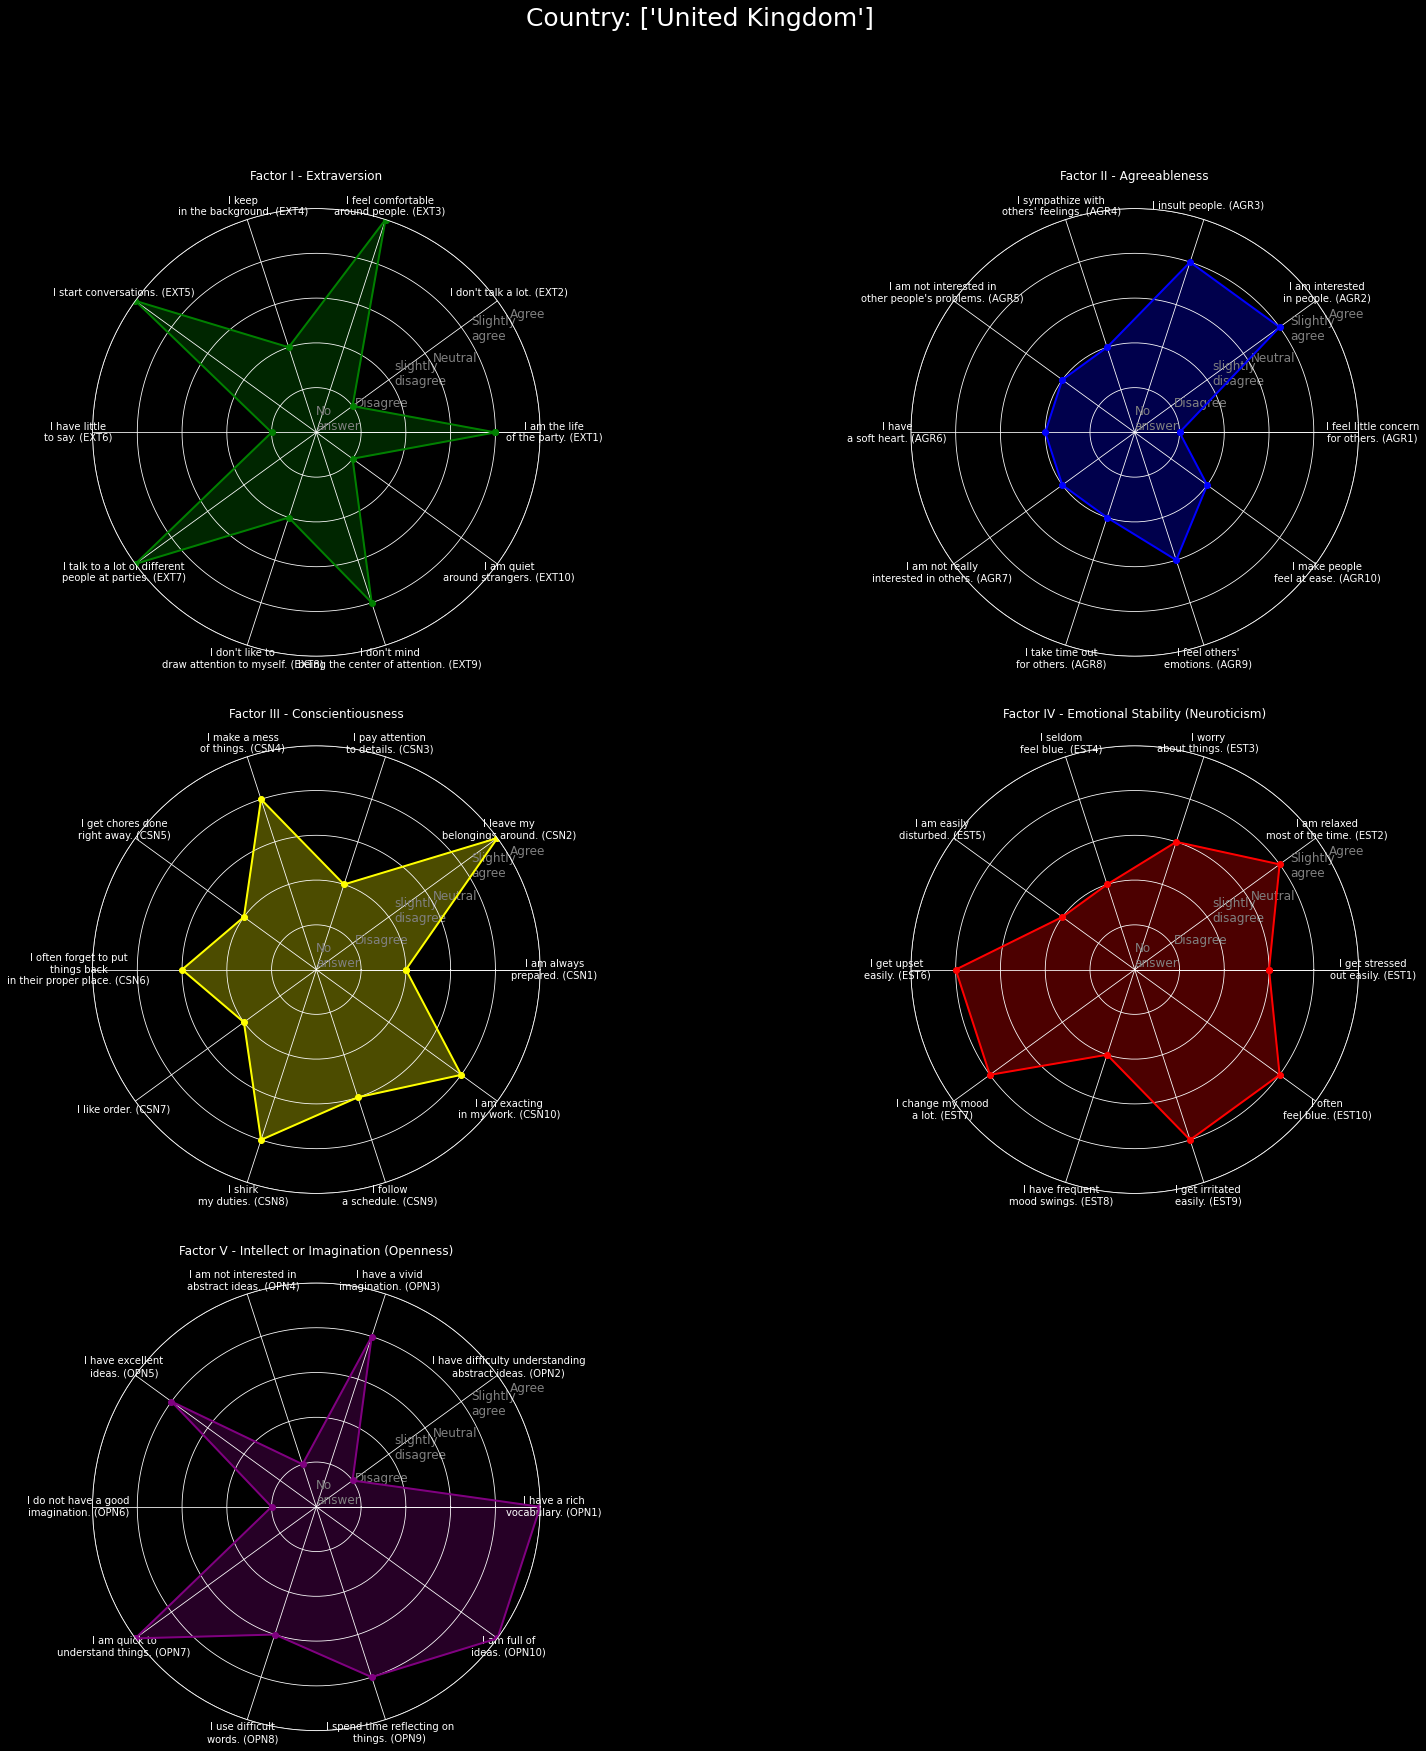

In [114]:
rowNo = 0

first_row_scores = np.array( BigFive.loc[ rowNo, BigFive.columns[0:50] ] )
country_name = np.array( BigFive.loc[ rowNo, BigFive.columns[-1] ] )

first_row_scores_with_country_name = np.append( first_row_scores, country_name )

make_radar(factor_scores= first_row_scores_with_country_name)

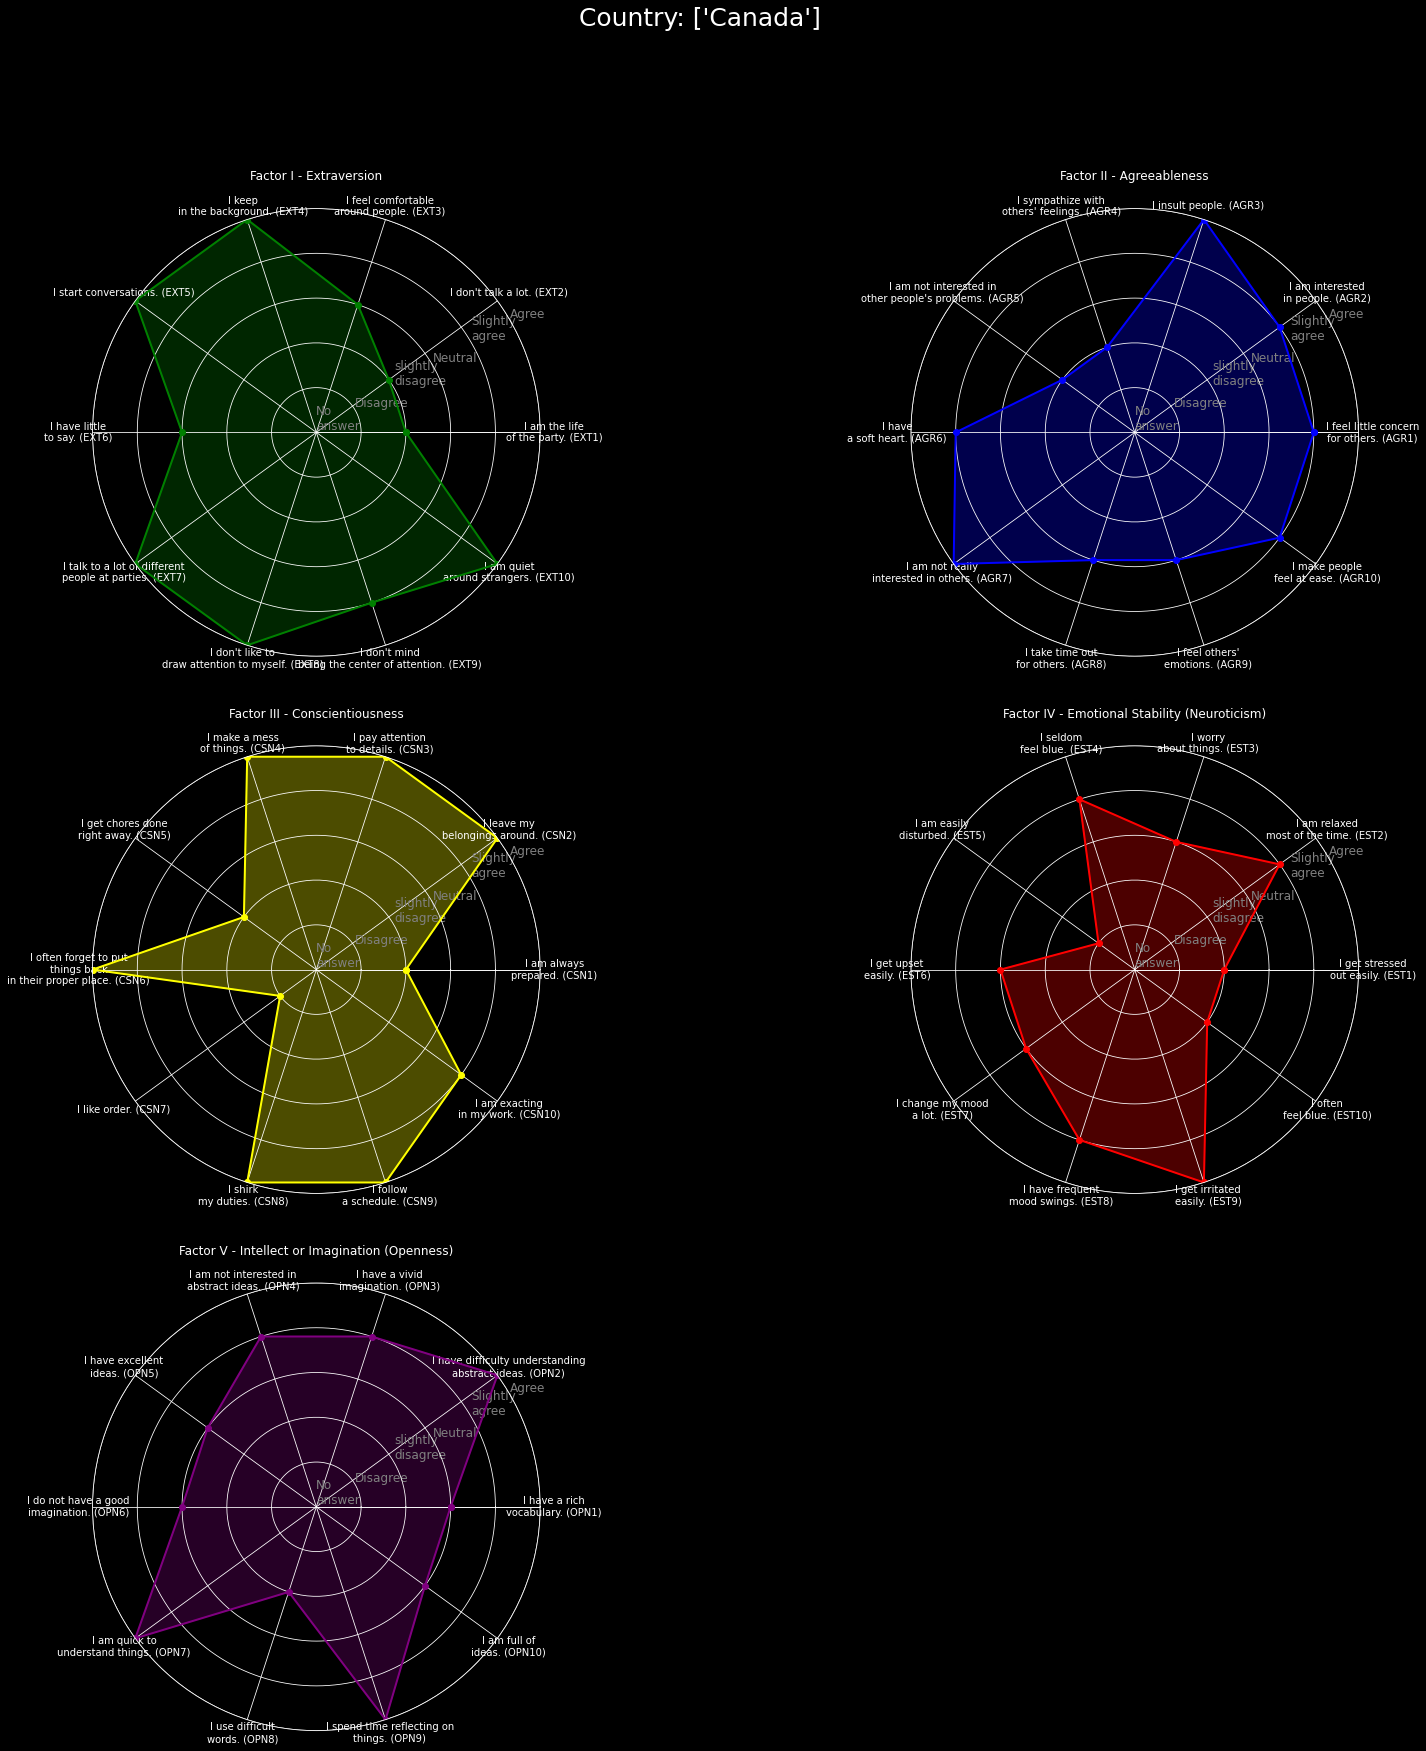

In [115]:
rowNo = 25

first_row_scores = np.array( BigFive.loc[ rowNo, BigFive.columns[0:50] ] )
country_name = np.array( BigFive.loc[ rowNo, BigFive.columns[-1] ] )

first_row_scores_with_country_name = np.append( first_row_scores, country_name )

make_radar(factor_scores= first_row_scores_with_country_name)

In [119]:
# np 5 krajów o najwyższym poziomie: 

    # EXT - Extraversion,
    # EST - Neuroticism,
    # AGR - Agreeableness (Zgodność),
    # CSN - Conscientiousness (sumienność),
    # OPN - Openness


# PCA ?
# ANOVA ?
# Linear regression ?
# logistic regression ?
# RADAR CHART ??